### General code

In [1]:
# import the models
from cobra.io import load_json_model
ecoli = load_json_model("../ecoli.json")
pf = load_json_model("../pf.json")
# print(ecoli.optimize())
# print(pf.optimize())
    
# load peripheral packages
import warnings
warnings.filterwarnings(action='once')
from pandas import set_option
set_option("display.max_rows", None)
from time import process_time

In [2]:
# print(dir(pf.problem.Constraint))
# from pprint import pprint
# var = pf.problem.Variable("test")
# var2 = pf.problem.Variable("test2")
# cons = pf.problem.Constraint(var2-2*var, name="|bio")
# pf.add_cons_vars([var, cons])
# pprint(pf.solver.to_json())

In [3]:
# Define the standard graphs from each simulation
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False,
        # "parsed":True
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass'
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_graphs(trial):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

#### Maltose & 4HB conditions

In [4]:
species_abundances = {
    1:{"ecoli":0, "pf":1},
    2:{"ecoli":1, "pf":50},
    3:{"ecoli":1, "pf":20},
    4:{"ecoli":1, "pf":10},
    5:{"ecoli":1, "pf":3},
    6:{"ecoli":1, "pf":1},
    7:{"ecoli":3, "pf":1},
    8:{"ecoli":10, "pf":1},
    9:{"ecoli":20, "pf":1},
    10:{"ecoli":1, "pf":0},
    11:{"ecoli":0, "pf":0}
}
carbon_conc_series = {'rows': {
    'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
    'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
}}
species_identities_rows = {
    1:{"ecoli":"mRuby"},
    2:{"ecoli":"ACS"},
    3:{"ecoli":"mRuby"},
    4:{"ecoli":"ACS"},
    5:{"ecoli":"mRuby"},
    6:{"ecoli":"ACS"}
}

# Maltose

#### coculture

In [5]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                }
        },
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


acetate {'consumed': ['cpd00029']}
malt {'consumed': ['cpd00179'], 'excreted': ['cpd00029']}
acetate {'consumed': ['cpd00029']}
4HB {'consumed': ['cpd00136']}
The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,

In [6]:
# display(fluxes_df)
# display(growth_df)
# display(experimental_metadata)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:82: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.015885416666666666 min
Done with DCC loop: 0.00026041666666666666 min
Done with the DBC & diffc loop: 0.0046875 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.13567708333333334 min
Done exporting the content: 0.046614583333333334 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:934: UserWarning: The conversion factor 0.0 optimized to a bound, which may be indicative of an error, such as improper kinetic rates.
  f"indicative of an error, such as improper kinetic rates.")


graph_0
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'phenotype': {'acetate', 'malt', '4HB', 'stationary'},
 'species': ['OD', 'pf', 'ecoli'],
 'trial': 'G6'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 

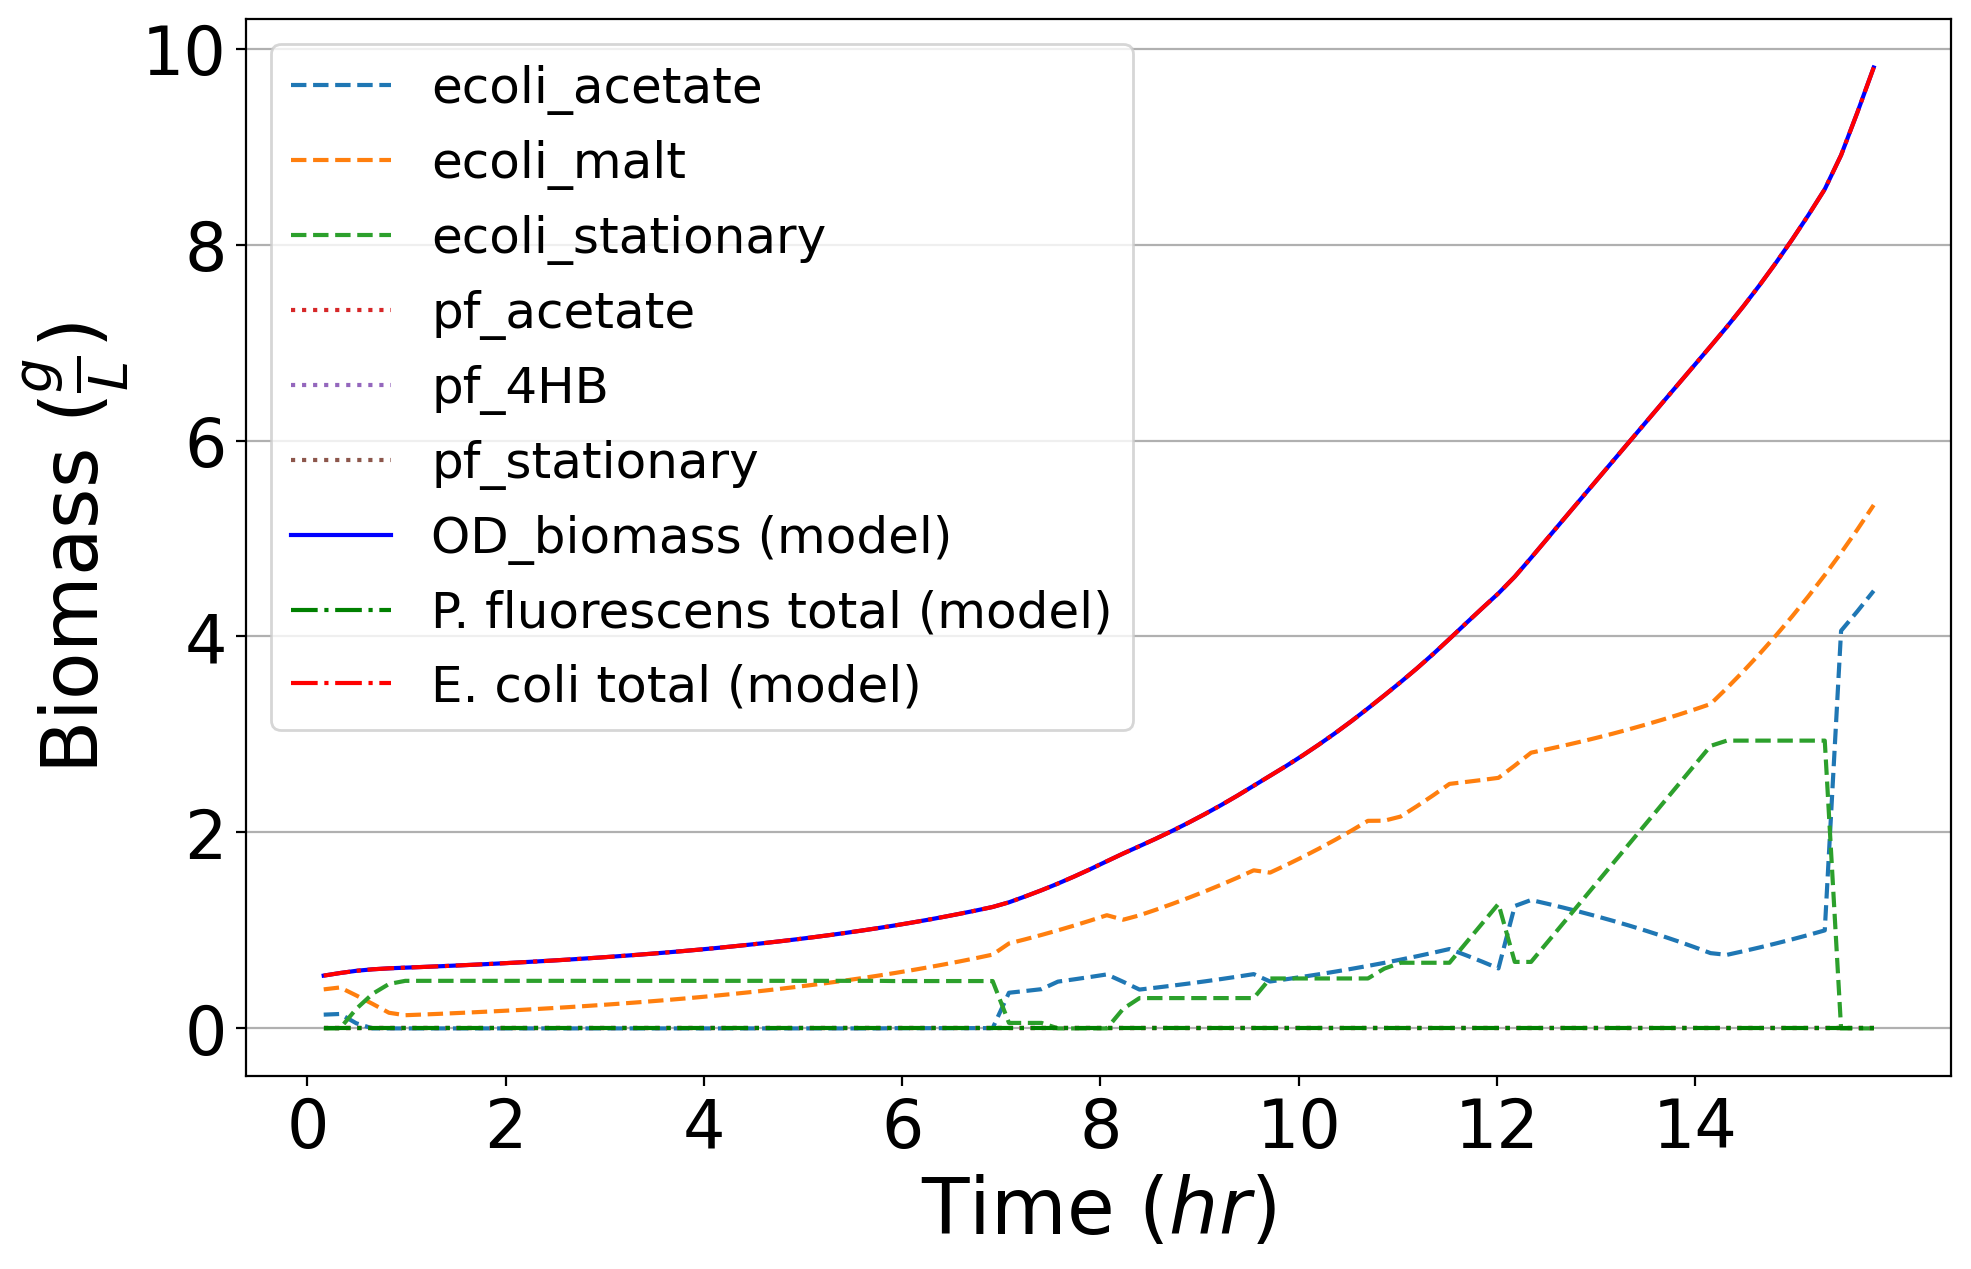

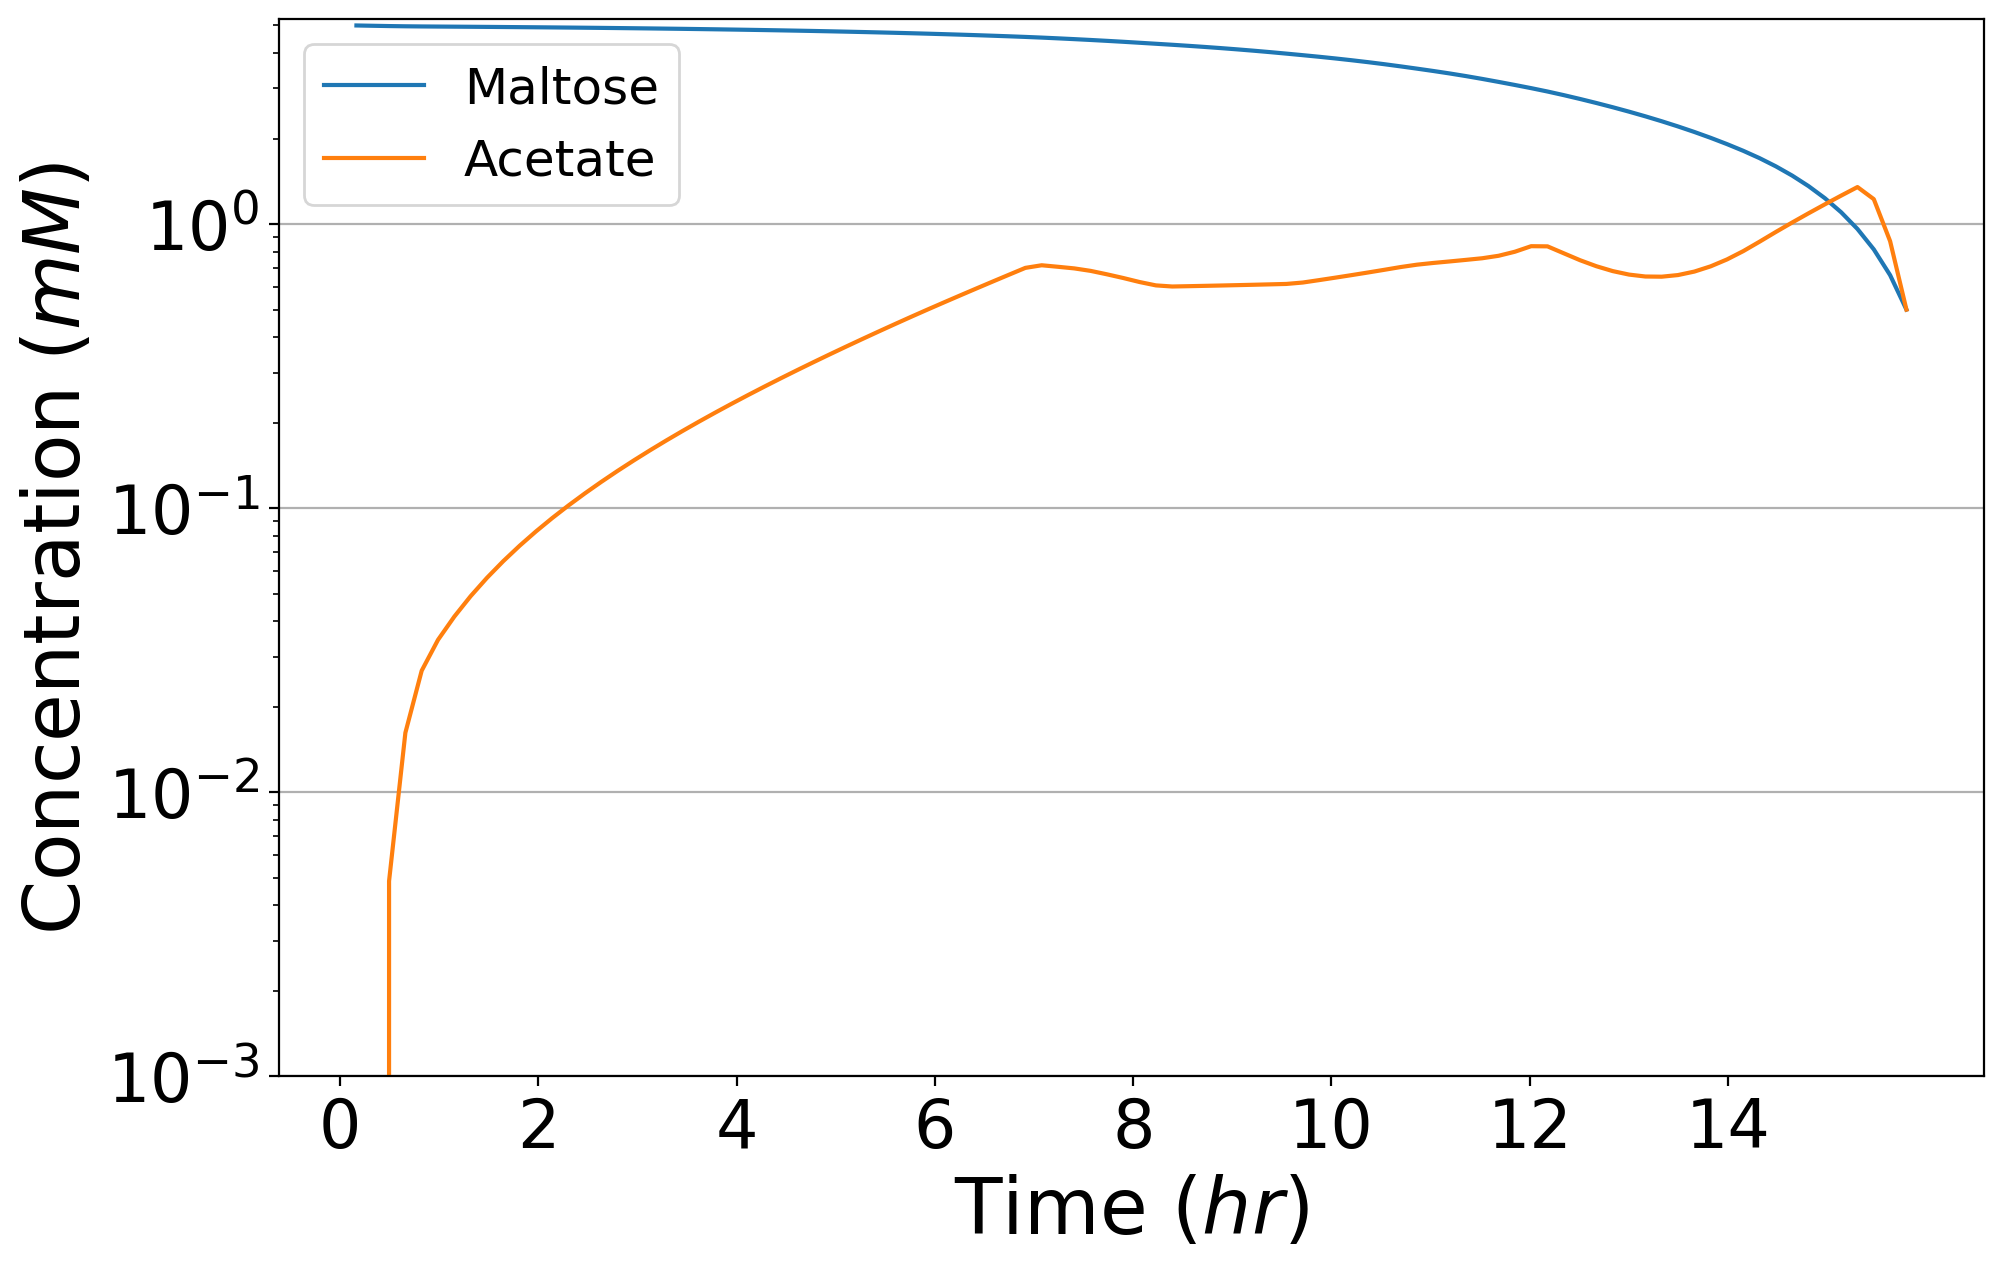

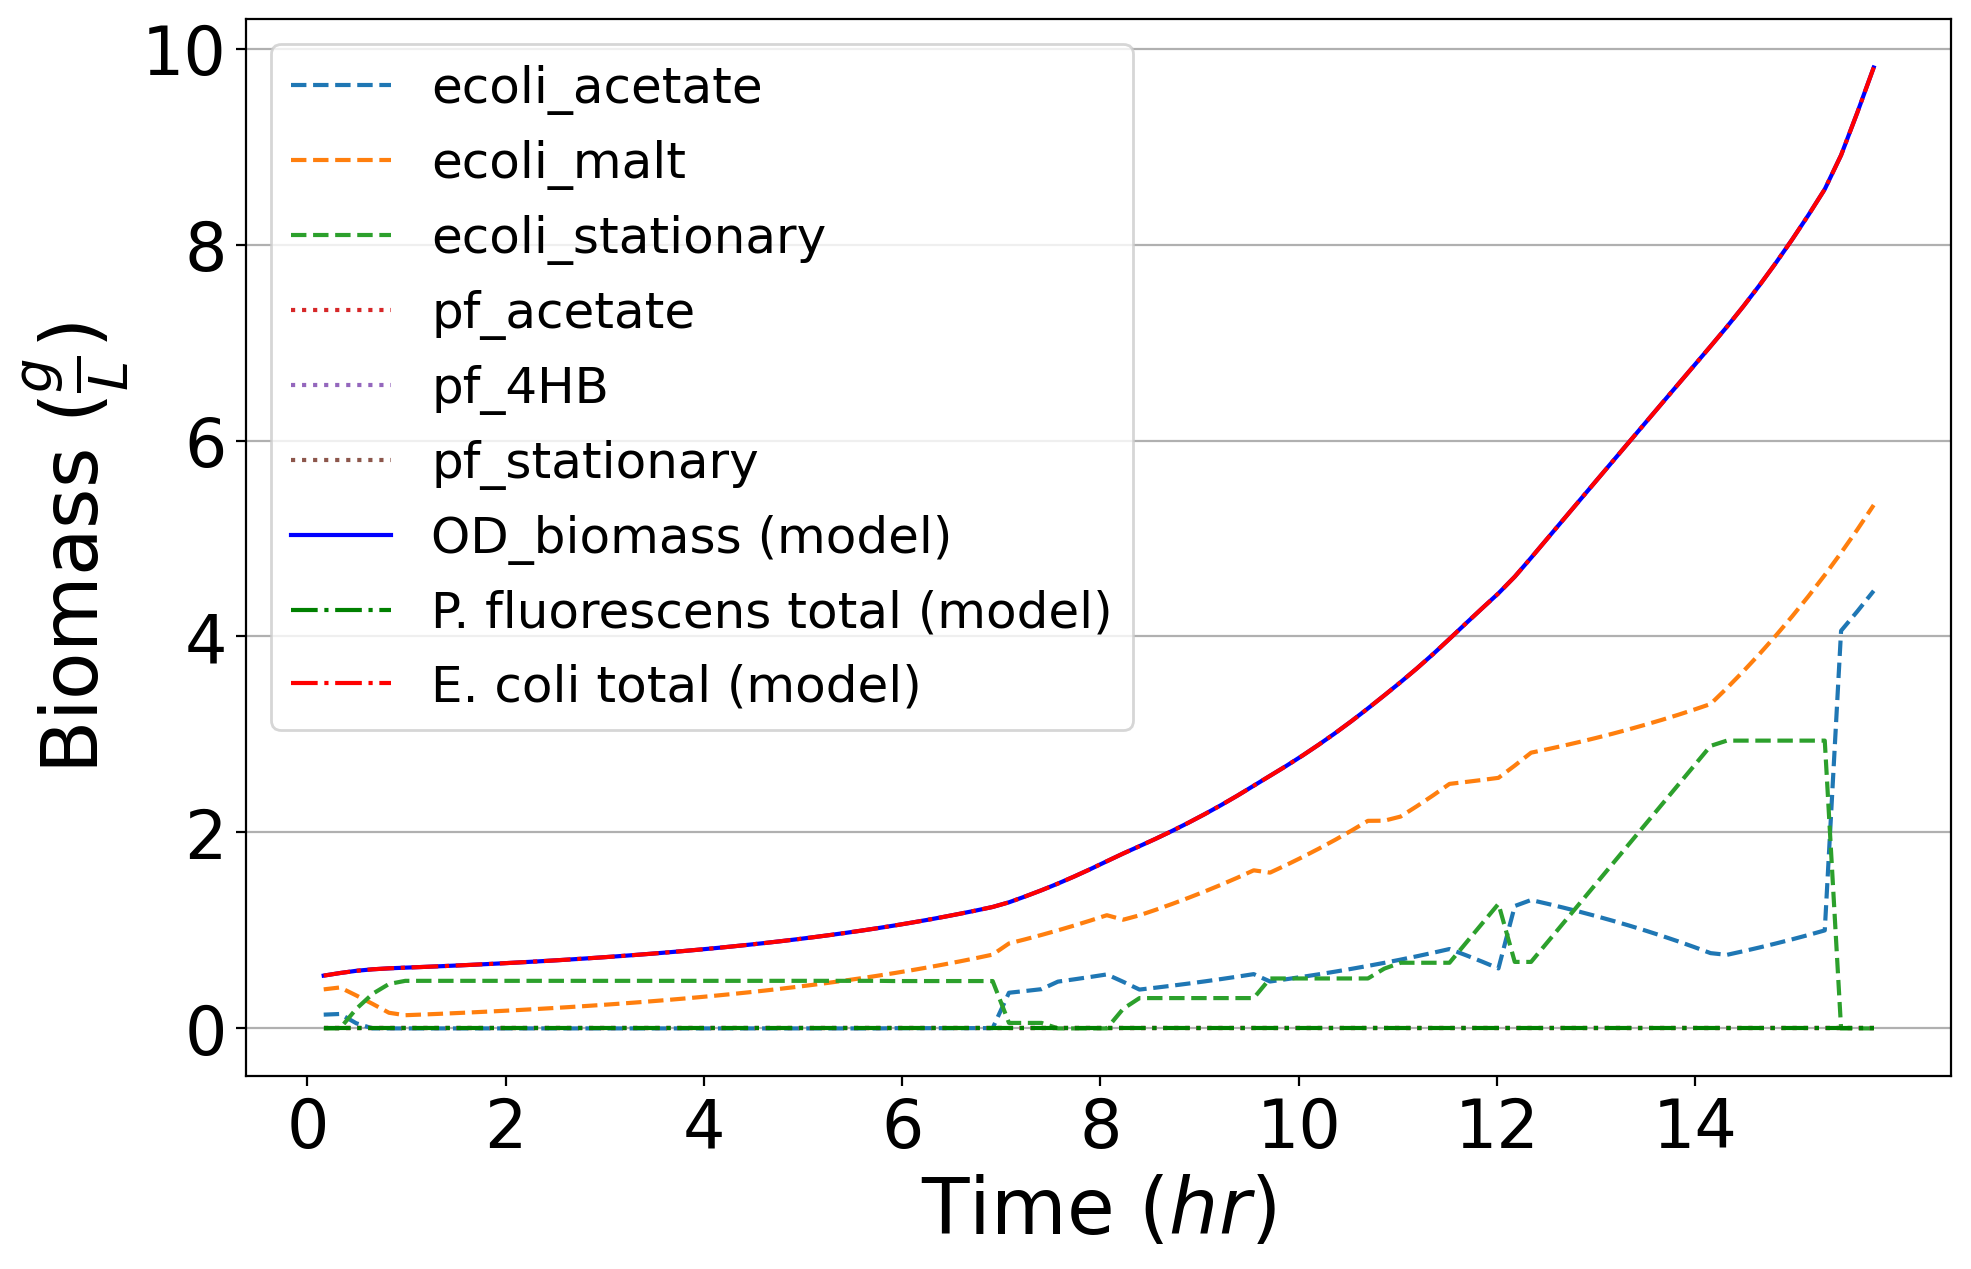

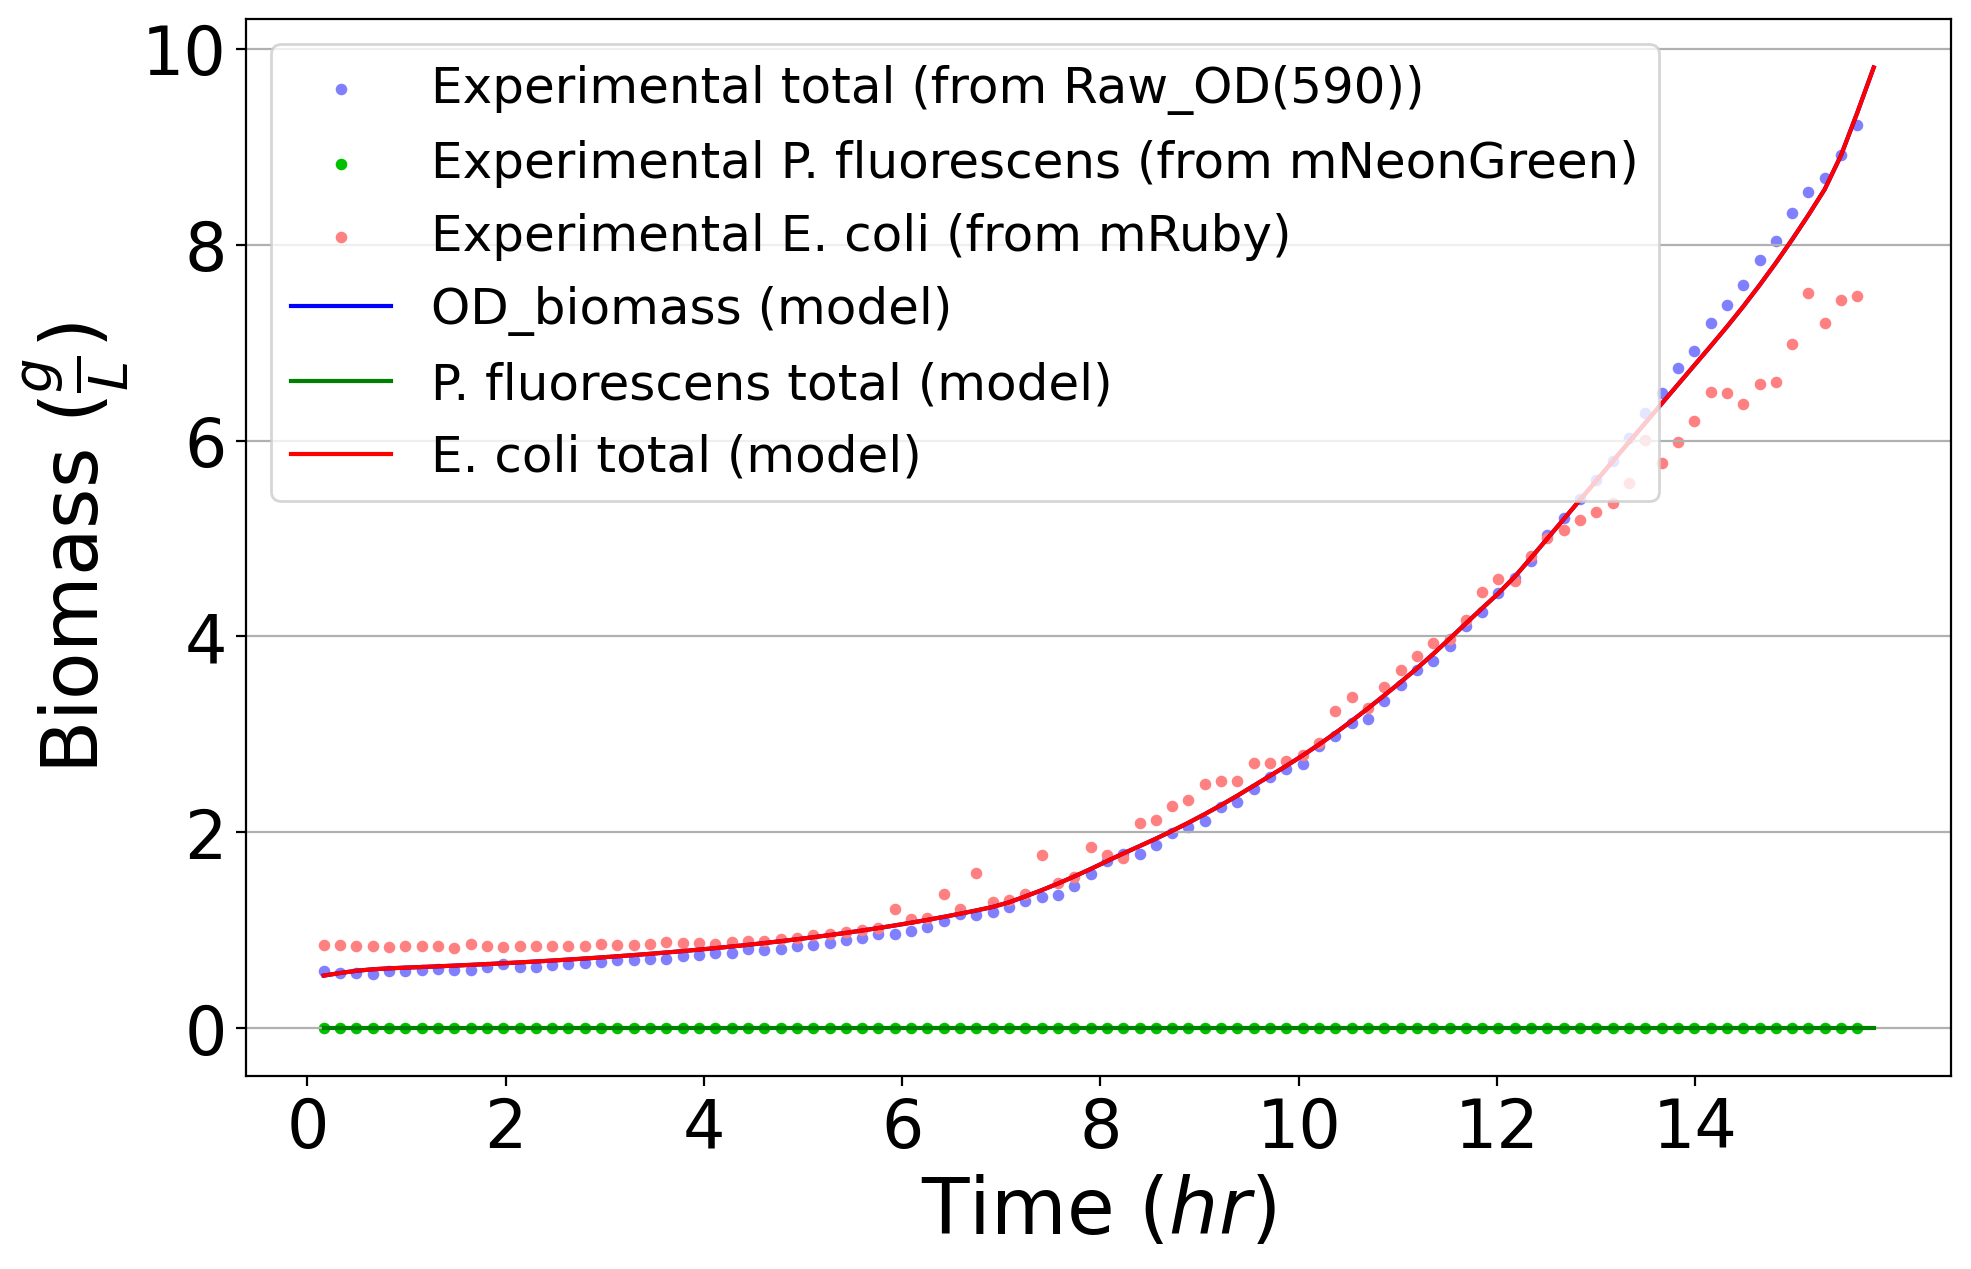

In [10]:
%run ../mscommfitting.py

maltose_co = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_co.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     rel_final_conc = {"cpd00179":0.1},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_graphs("G6"), 
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_coculture.lp")

#### Pseudomonas

In [7]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,3,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = species_identities_rows,
    significant_deviation=None
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G1

In [8]:
display(experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc)

,trial_IDs,short_code,base_media,additional_compounds,strains,date
0,r1_pf-,G1,minimal components media,cpd00179:5:5,pf:r1,"Apr 29, 22"
1,r50_pf-,G2,minimal components media,cpd00179:5:5,pf:r50,"Apr 29, 22"
2,r20_pf-,G3,minimal components media,cpd00179:5:5,pf:r20,"Apr 29, 22"
3,r10_pf-,G4,minimal components media,cpd00179:5:5,pf:r10,"Apr 29, 22"
4,r3_pf-,G5,minimal components media,cpd00179:5:5,pf:r3,"Apr 29, 22"
5,r1_pf-,G6,minimal components media,cpd00179:5:5,pf:r1,"Apr 29, 22"
6,r1_pf-,G7,minimal components media,cpd00179:5:5,pf:r1,"Apr 29, 22"
7,r1_pf-,G8,minimal components media,cpd00179:5:5,pf:r1,"Apr 29, 22"
8,r1_pf-,G9,minimal components media,cpd00179:5:5,pf:r1,"Apr 29, 22"
9,,G10,minimal components media,cpd00179:5:5,pf:r0,"Apr 29, 22"


,trial_IDs,Time (s),OD:Raw_OD(590),pf:mNeonGreen
short_codes,,,,
G1,r1_pf-,0.0000,0.068419,23472.0
G1,r1_pf-,595.8665,0.070793,22608.0
G1,r1_pf-,1187.7460,0.066054,22663.0
G1,r1_pf-,1780.2145,0.064892,22547.0
G1,r1_pf-,2372.7100,0.065168,22284.0
G1,r1_pf-,2965.2370,0.065911,22194.0
G1,r1_pf-,3557.5625,0.065767,22015.0
G1,r1_pf-,4149.9960,0.066293,21854.0
G1,r1_pf-,4742.4155,0.067431,21309.0


,pf_acetate,pf_4HB,pf_stationary
rxn,,,
EX_cpd00001_e0,4.533296e+00,2.449417e+00,0
EX_cpd00007_e0,-2.025521e+00,-5.333032e+00,0
EX_cpd00009_e0,-7.625410e-02,-7.625410e-02,0
EX_cpd00011_e0,2.377641e+00,5.685222e+00,0
EX_cpd00012_e0,0.000000e+00,-8.351191e-15,0
EX_cpd00013_e0,-8.611666e-01,-8.611666e-01,0
EX_cpd00029_e0,-3.063614e+00,0.000000e+00,0
EX_cpd00030_e0,-2.806159e-04,-2.806159e-04,0
EX_cpd00034_e0,-2.806159e-04,-2.806159e-04,0


{'cpd00136': {'G1': 0,
  'G2': 0,
  'G3': 0,
  'G4': 0,
  'G5': 0,
  'G6': 0,
  'G7': 0,
  'G8': 0,
  'G9': 0,
  'G10': 0,
  'G11': 0,
  'G12': 0,
  'G13': 0,
  'G14': 0,
  'G15': 0,
  'G16': 0,
  'G17': 0,
  'G18': 0,
  'G19': 0,
  'G20': 0,
  'G21': 0,
  'G22': 0,
  'G23': 1,
  'G24': 1,
  'G25': 1,
  'G26': 1,
  'G27': 1,
  'G28': 1,
  'G29': 1,
  'G30': 1,
  'G31': 1,
  'G32': 1,
  'G33': 1,
  'G34': 1,
  'G35': 1,
  'G36': 1,
  'G37': 1,
  'G38': 1,
  'G39': 1,
  'G40': 1,
  'G41': 1,
  'G42': 1,
  'G43': 1,
  'G44': 1,
  'G45': 4,
  'G46': 4,
  'G47': 4,
  'G48': 4,
  'G49': 4,
  'G50': 4,
  'G51': 4,
  'G52': 4,
  'G53': 4,
  'G54': 4,
  'G55': 4,
  'G56': 4,
  'G57': 4,
  'G58': 4,
  'G59': 4,
  'G60': 4,
  'G61': 4,
  'G62': 4,
  'G63': 4,
  'G64': 4,
  'G65': 4,
  'G66': 4},
 'cpd00179': {'G1': 5,
  'G2': 5,
  'G3': 5,
  'G4': 5,
  'G5': 5,
  'G6': 5,
  'G7': 5,
  'G8': 5,
  'G9': 5,
  'G10': 5,
  'G11': 5,
  'G12': 5,
  'G13': 5,
  'G14': 5,
  'G15': 5,
  'G16': 5,
  'G17': 

{'B': {'2': ('G1', 'r1_pf-'),
  '3': ('G2', 'r50_pf-'),
  '4': ('G3', 'r20_pf-'),
  '5': ('G4', 'r10_pf-'),
  '6': ('G5', 'r3_pf-'),
  '7': ('G6', 'r1_pf-'),
  '8': ('G7', 'r1_pf-'),
  '9': ('G8', 'r1_pf-'),
  '10': ('G9', 'r1_pf-'),
  '11': ('G10', ''),
  '12': ('G11', '')},
 'C': {'2': ('G12', 'r1_pf-'),
  '3': ('G13', 'r50_pf-'),
  '4': ('G14', 'r20_pf-'),
  '5': ('G15', 'r10_pf-'),
  '6': ('G16', 'r3_pf-'),
  '7': ('G17', 'r1_pf-'),
  '8': ('G18', 'r1_pf-'),
  '9': ('G19', 'r1_pf-'),
  '10': ('G20', 'r1_pf-'),
  '11': ('G21', ''),
  '12': ('G22', '')},
 'D': {'2': ('G23', 'r1_pf-1_pf-'),
  '3': ('G24', 'r50_pf-1_pf-'),
  '4': ('G25', 'r20_pf-1_pf-'),
  '5': ('G26', 'r10_pf-1_pf-'),
  '6': ('G27', 'r3_pf-1_pf-'),
  '7': ('G28', 'r1_pf-1_pf-'),
  '8': ('G29', 'r1_pf-1_pf-'),
  '9': ('G30', 'r1_pf-1_pf-'),
  '10': ('G31', 'r1_pf-1_pf-'),
  '11': ('G32', '1_pf-'),
  '12': ('G33', '1_pf-')},
 'E': {'2': ('G34', 'r1_pf-1_pf-'),
  '3': ('G35', 'r50_pf-1_pf-'),
  '4': ('G36', 'r20_pf-1_pf-

0.16359110609103078

27.15612361111111

set()

In [9]:
%run ../mscommfitting.py

maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
try:
    maltose_4HB_commfit.fit(
        parameters={
            'v':.3,
            'cvmin': .1,
            'bcv': 0.0001,
            'diffpos': 100,
            'diffneg': 100
            }, 
         mets_to_track = ["cpd00179","cpd00029"],
         rel_final_conc = {"cpd00179":0.2},
         zero_start=["cpd00029"],
        abs_final_conc={"cpd00029":0.5}, # metabolomics data
           graphs = update_graphs("G1"), 
        msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
        publishing=True,
        export_lp="maltose_pf.lp")
except (NoFluxError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:81: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.00078125 min
Done with DCC loop: 0.0 min
Done with the DBC & diffc loop: 0.0013020833333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0640625 min
Done exporting the content: 0.009375 min
The solution is sub-optimal, with a(n) infeasible status.


#### E. coli

In [5]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,7,8,9,10,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


acetate {'consumed': ['cpd00029']}
malt {'consumed': ['cpd00179'], 'excreted': ['cpd00029']}
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] t

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:82: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.003125 min
Done with DCC loop: 0.00026041666666666666 min
Done with the DBC & diffc loop: 0.0015625 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.04791666666666667 min
Done exporting the content: 0.01484375 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:948: UserWarning: The conversion factor 0.0 optimized to a bound, which may be indicative of an error, such as improper kinetic rates.
  warnings.warn(f"The conversion factor {value} optimized to a bound, which may be "


graph_0
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'phenotype': {'acetate', 'stationary', 'malt'},
 'species': ['OD', 'ecoli'],
 'trial': 'G10'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
  

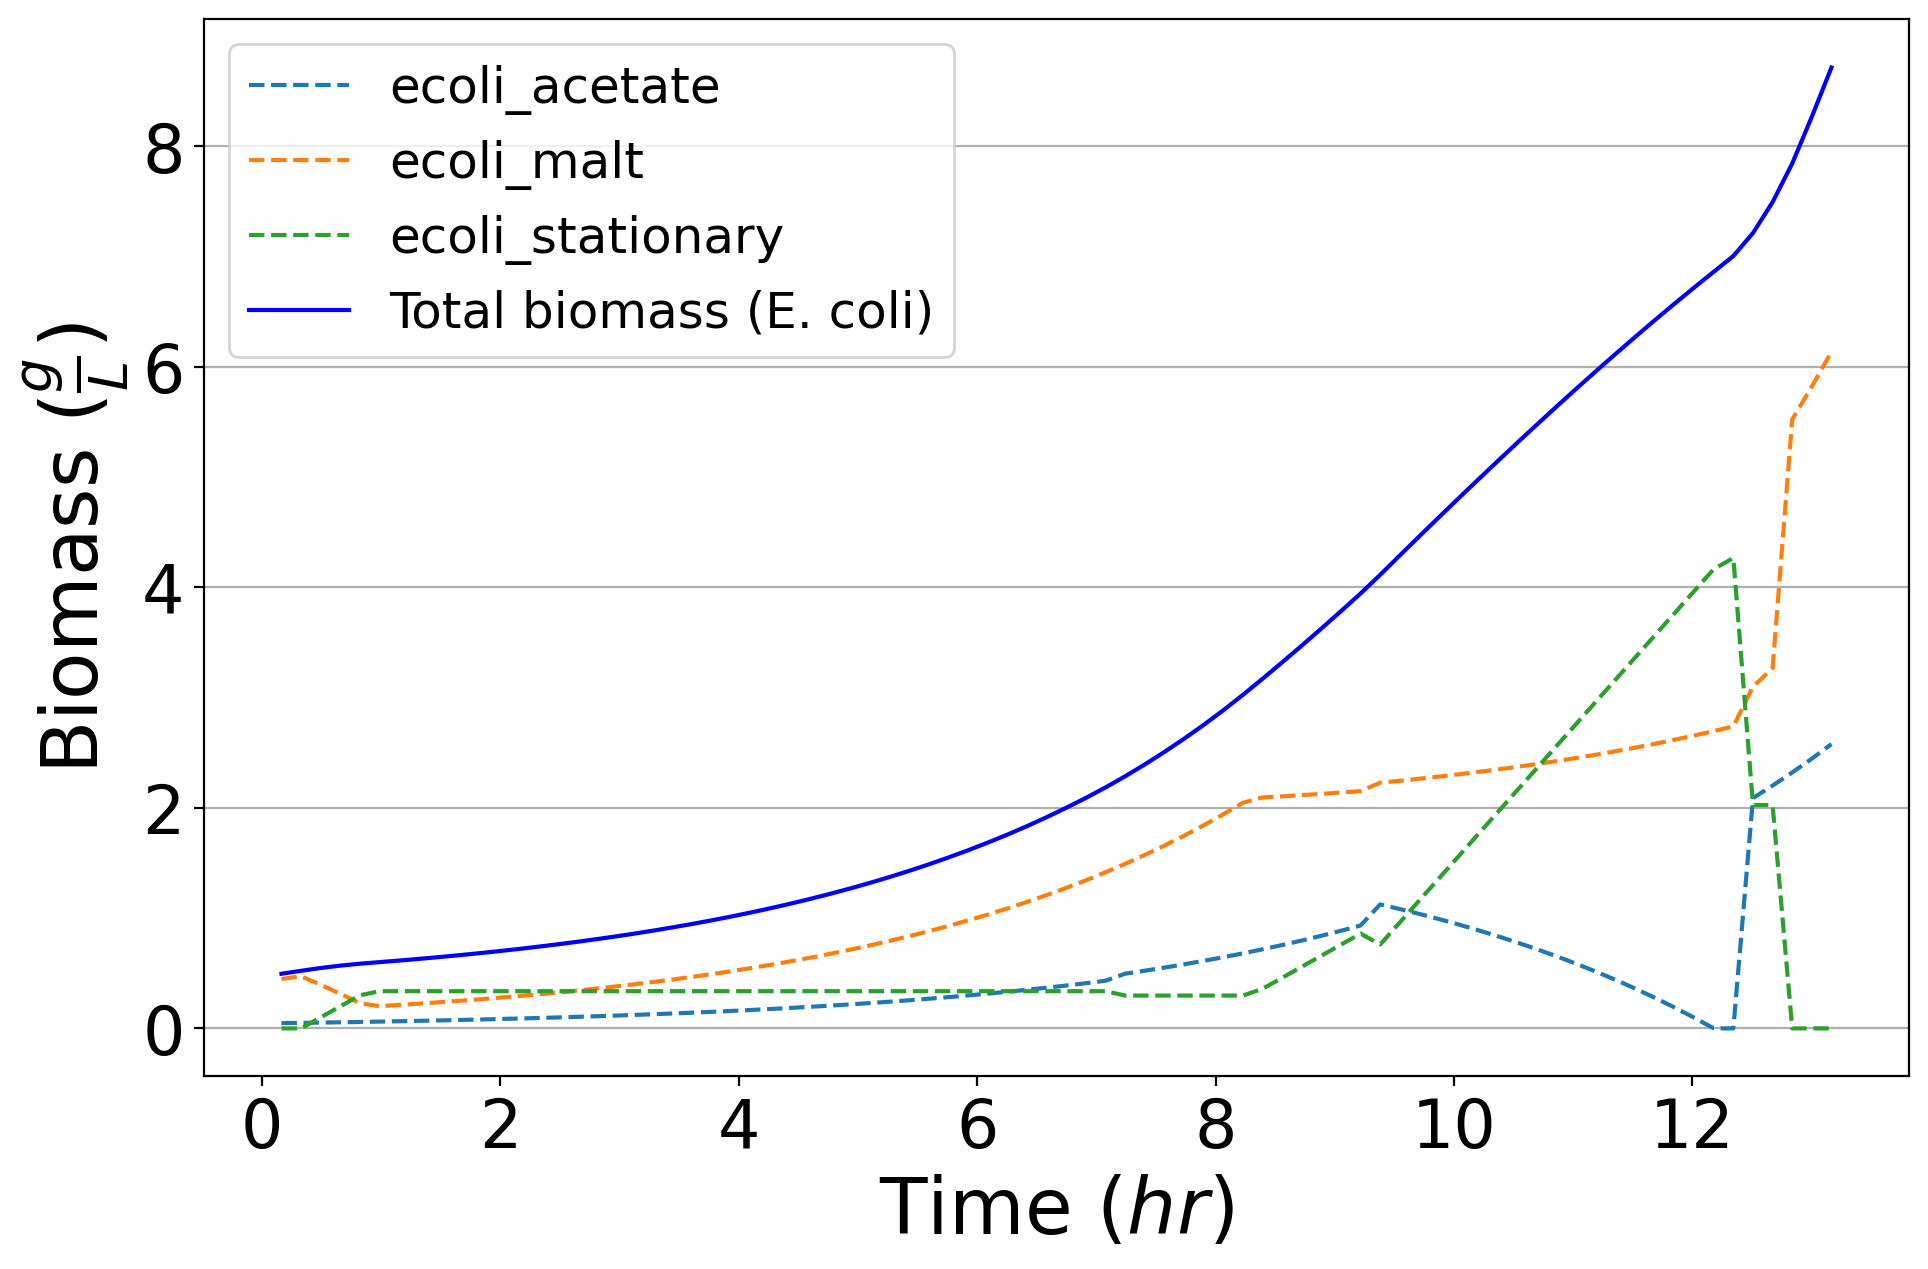

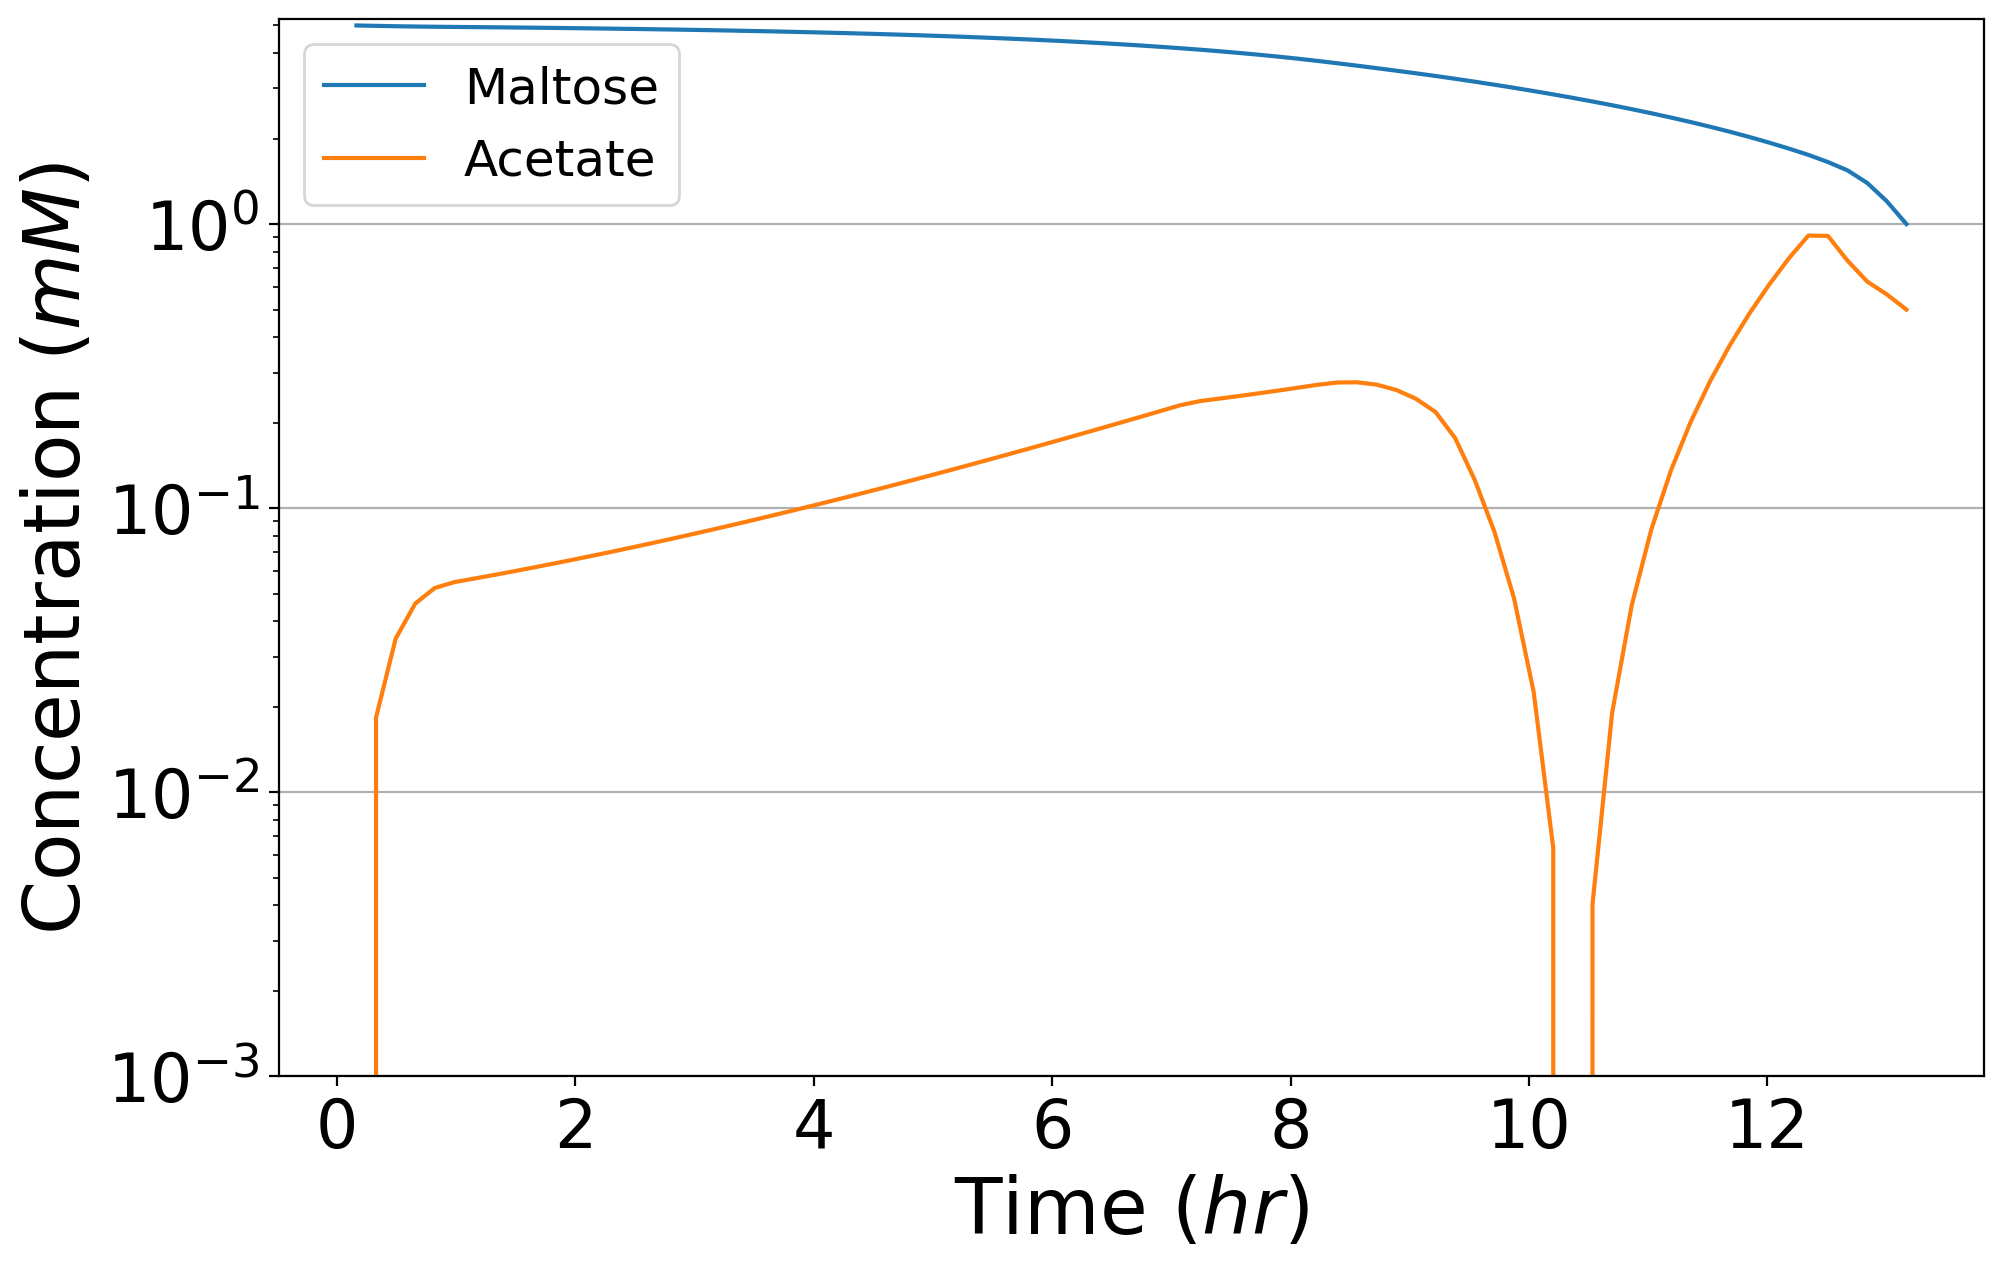

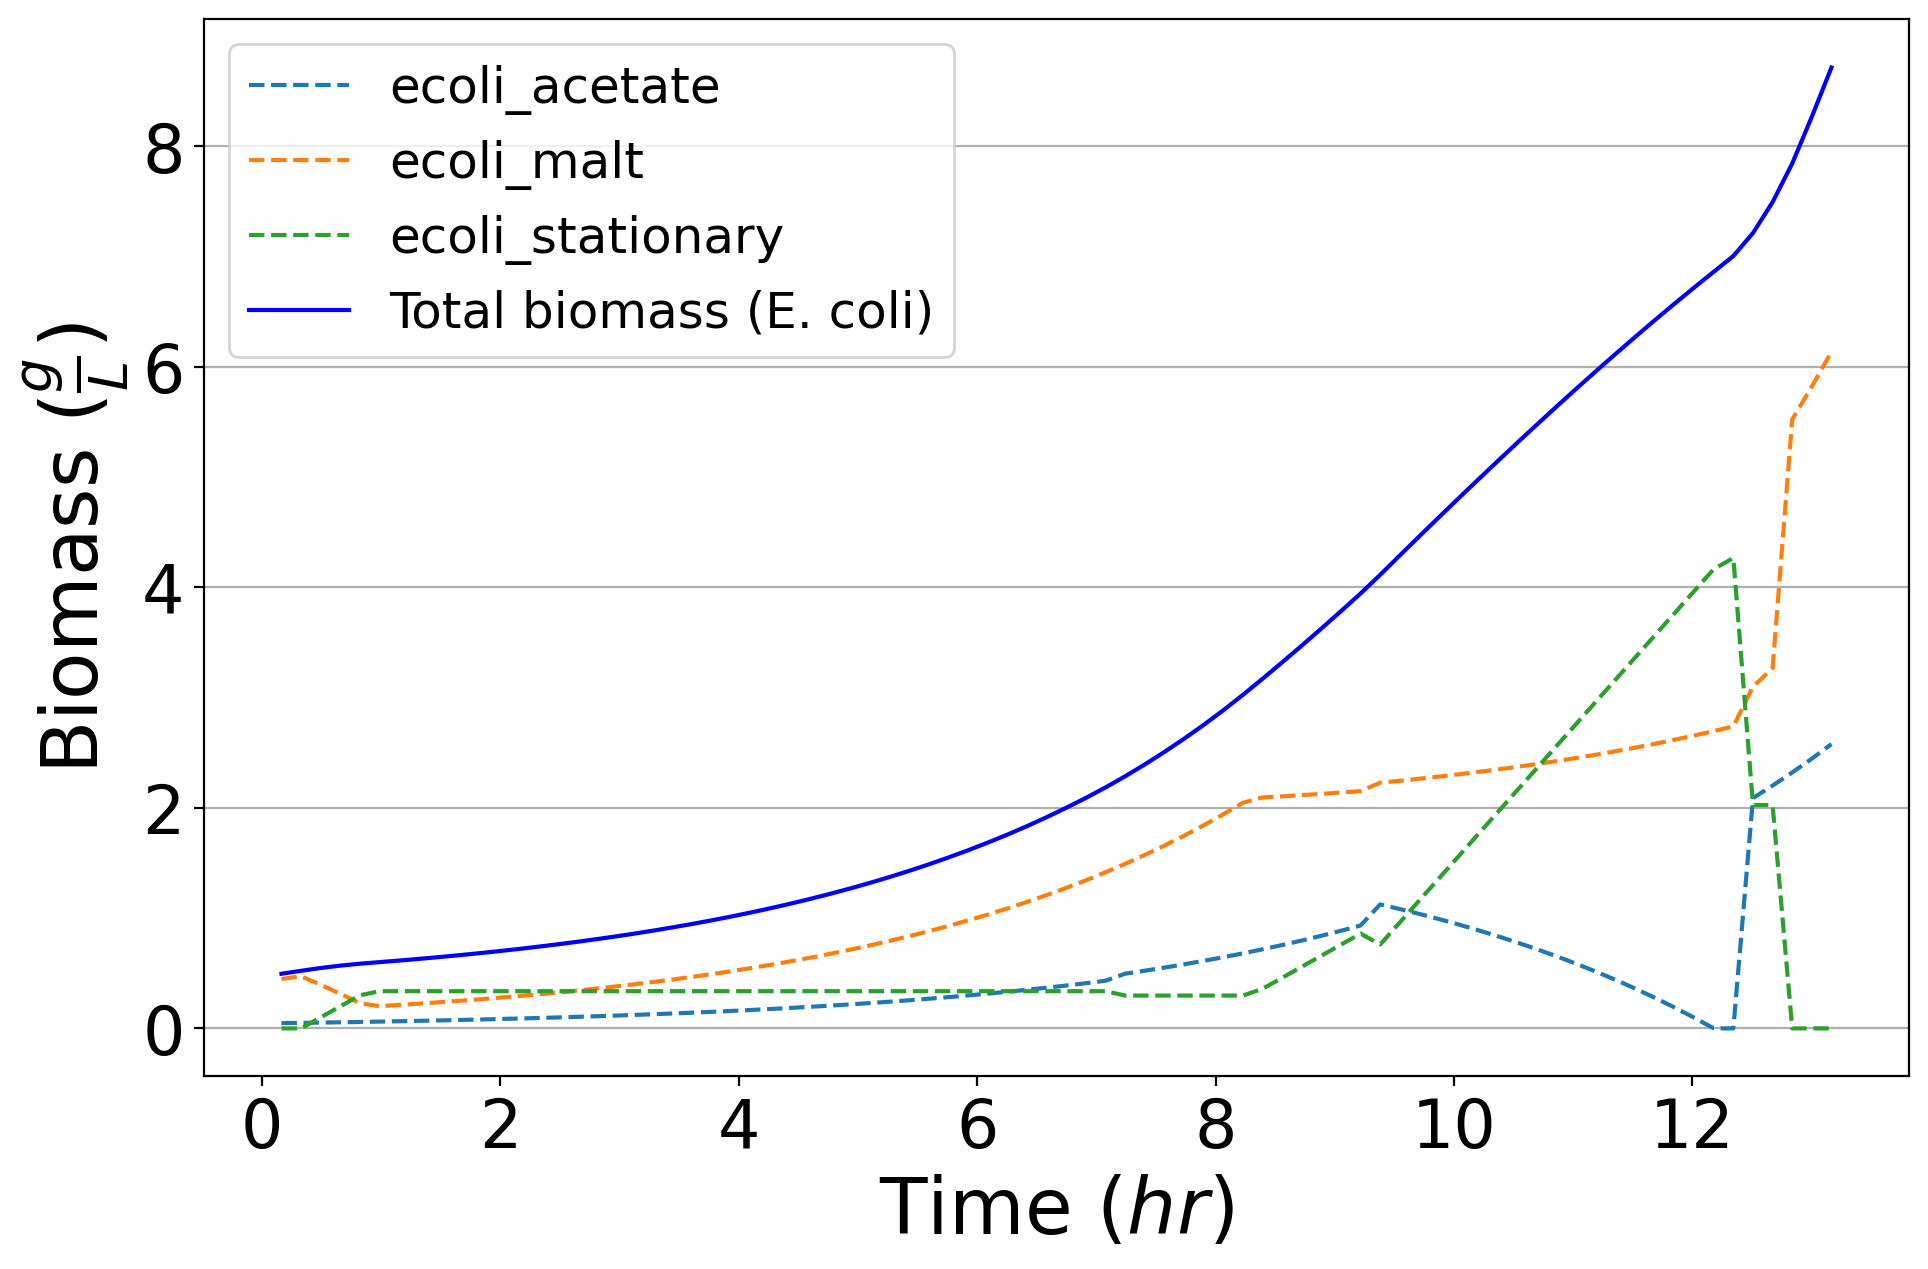

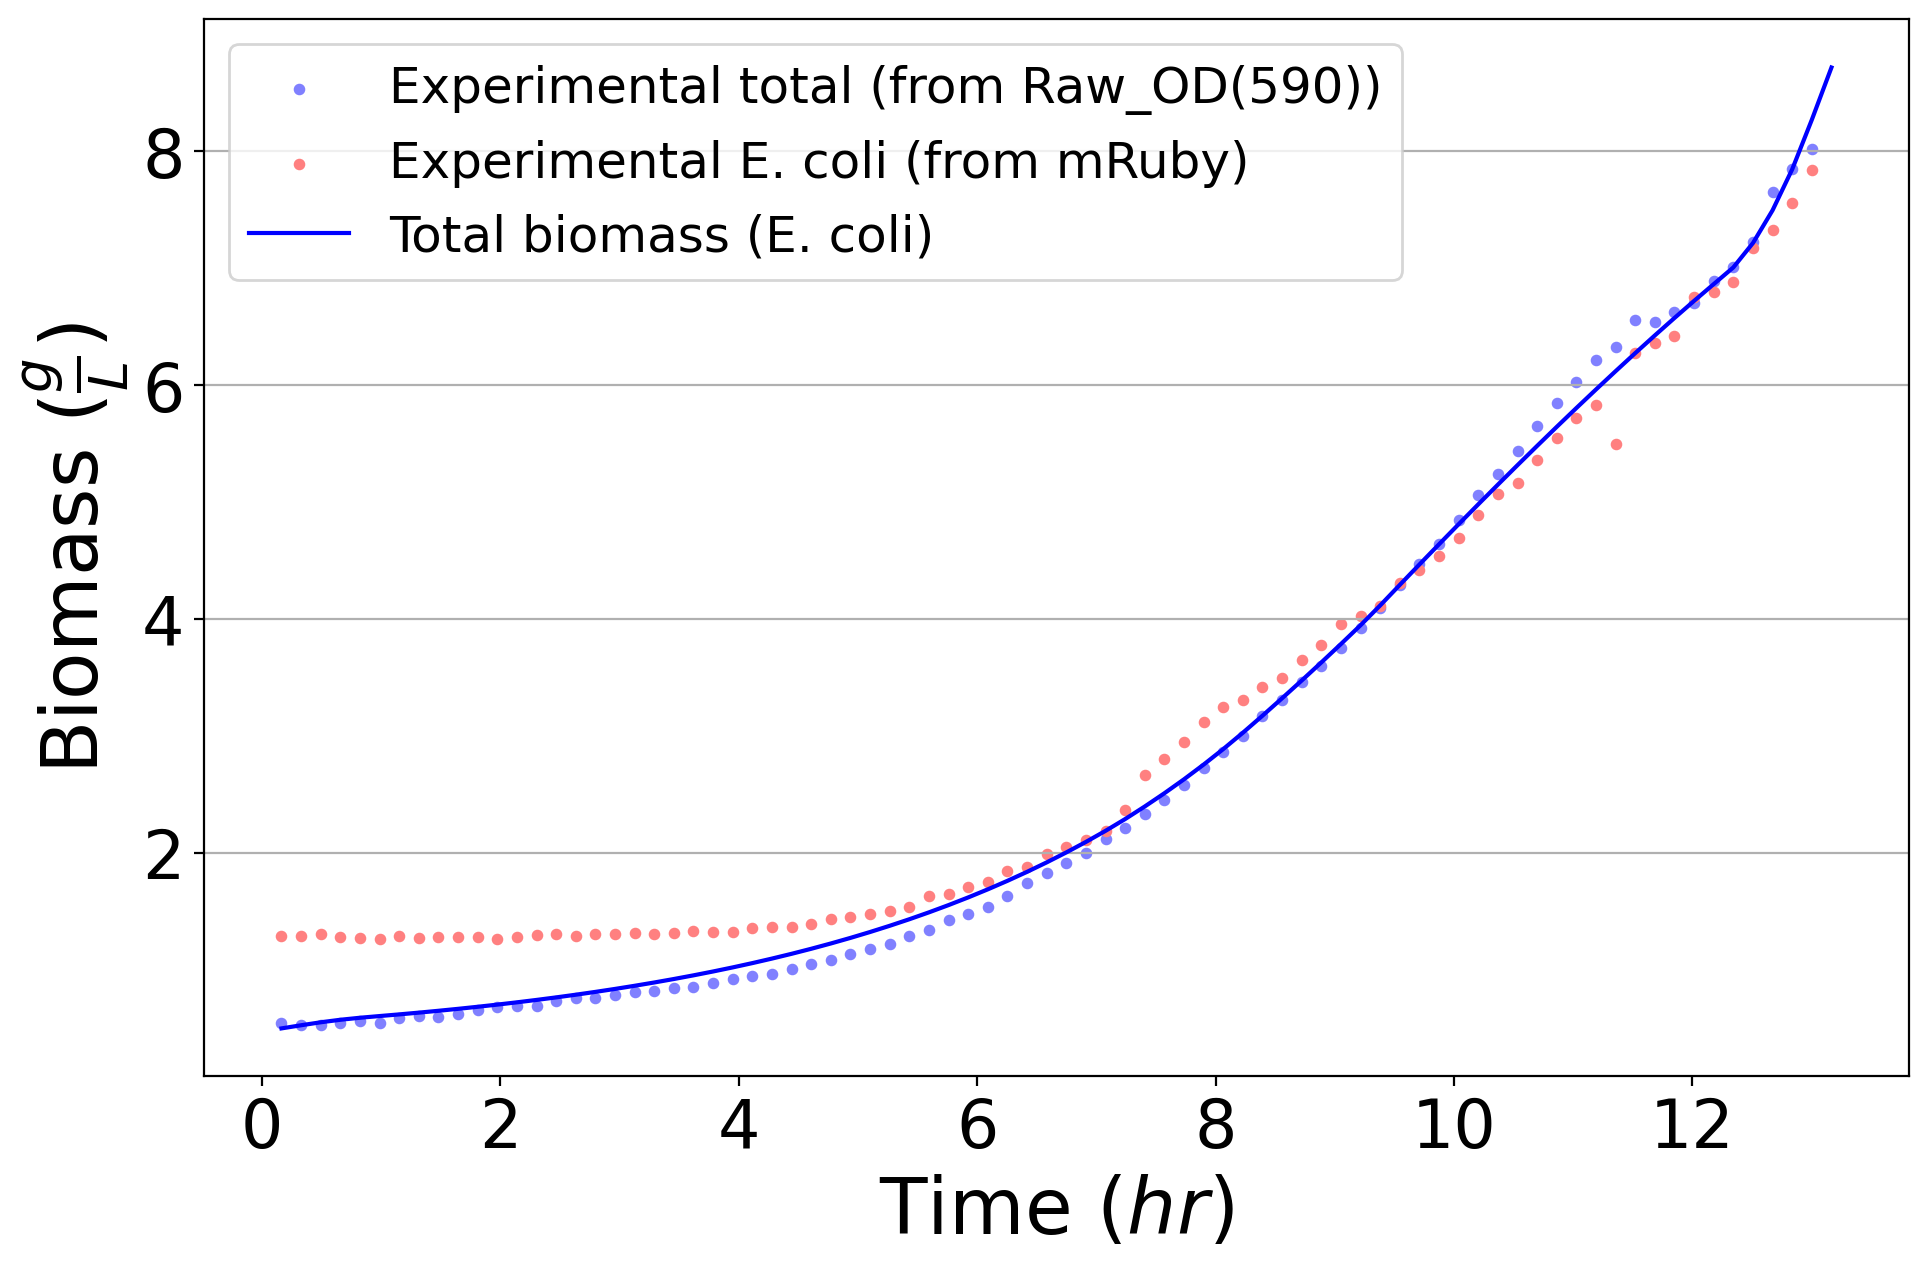

In [8]:
%run ../mscommfitting.py

maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        # 'v':,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_graphs("G10"), 
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_ecoli.lp")

# Maltose + 4HB

#### Coculture

In [12]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                }
        },
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,2,3,4,5,6,8,9,10,11,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.29048522 1.29015896 1.287999

In [13]:
trial_name_conversion

{'B': {'2': ('G1', 'r1_pf-5_ecoli'),
  '3': ('G2', 'r1_ecoli_mRuby-r50_pf-5_ecoli'),
  '4': ('G3', 'r1_ecoli_mRuby-r20_pf-5_ecoli'),
  '5': ('G4', 'r1_ecoli_mRuby-r10_pf-5_ecoli'),
  '6': ('G5', 'r1_ecoli_mRuby-r3_pf-5_ecoli'),
  '7': ('G6', 'r1_ecoli_mRuby-r1_pf-5_ecoli'),
  '8': ('G7', 'r3_ecoli_mRuby-r1_pf-5_ecoli'),
  '9': ('G8', 'r10_ecoli_mRuby-r1_pf-5_ecoli'),
  '10': ('G9', 'r20_ecoli_mRuby-r1_pf-5_ecoli'),
  '11': ('G10', 'r1_ecoli_mRuby-5_ecoli'),
  '12': ('G11', '5_ecoli')},
 'C': {'2': ('G12', 'r1_pf-5_ecoli'),
  '3': ('G13', 'r1_ecoli_ACS-r50_pf-5_ecoli'),
  '4': ('G14', 'r1_ecoli_ACS-r20_pf-5_ecoli'),
  '5': ('G15', 'r1_ecoli_ACS-r10_pf-5_ecoli'),
  '6': ('G16', 'r1_ecoli_ACS-r3_pf-5_ecoli'),
  '7': ('G17', 'r1_ecoli_ACS-r1_pf-5_ecoli'),
  '8': ('G18', 'r3_ecoli_ACS-r1_pf-5_ecoli'),
  '9': ('G19', 'r10_ecoli_ACS-r1_pf-5_ecoli'),
  '10': ('G20', 'r20_ecoli_ACS-r1_pf-5_ecoli'),
  '11': ('G21', 'r1_ecoli_ACS-5_ecoli'),
  '12': ('G22', '5_ecoli')},
 'D': {'2': ('G23', 'r1_pf-

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:81: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.00078125 min
Done with DCC loop: 0.0 min
Done with the DBC & diffc loop: 0.0015625 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.05625 min
Done exporting the content: 0.010677083333333334 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'painting': {'OD': {'color': 'blue',
                     'linestyle': 'solid',
                     'name': 'Total biomass'},
              'ecoli': {'color': 'red',
                        'linestyle': 'dashed',
                        'name': 'E. coli'},
              'pf': {'color': 'green',
                     'linestyle': 'dotted',
                     'name': 'P. fluorescens'}},
 'parsed': False,
 'phenotype': {'acetate', 'malt', '4HB', 'stationary'},
 'species': ['pf', 'ecoli'],
 'trial': 'G50'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179', 'cpd00029'],
 'painting': {'OD': {'color': '

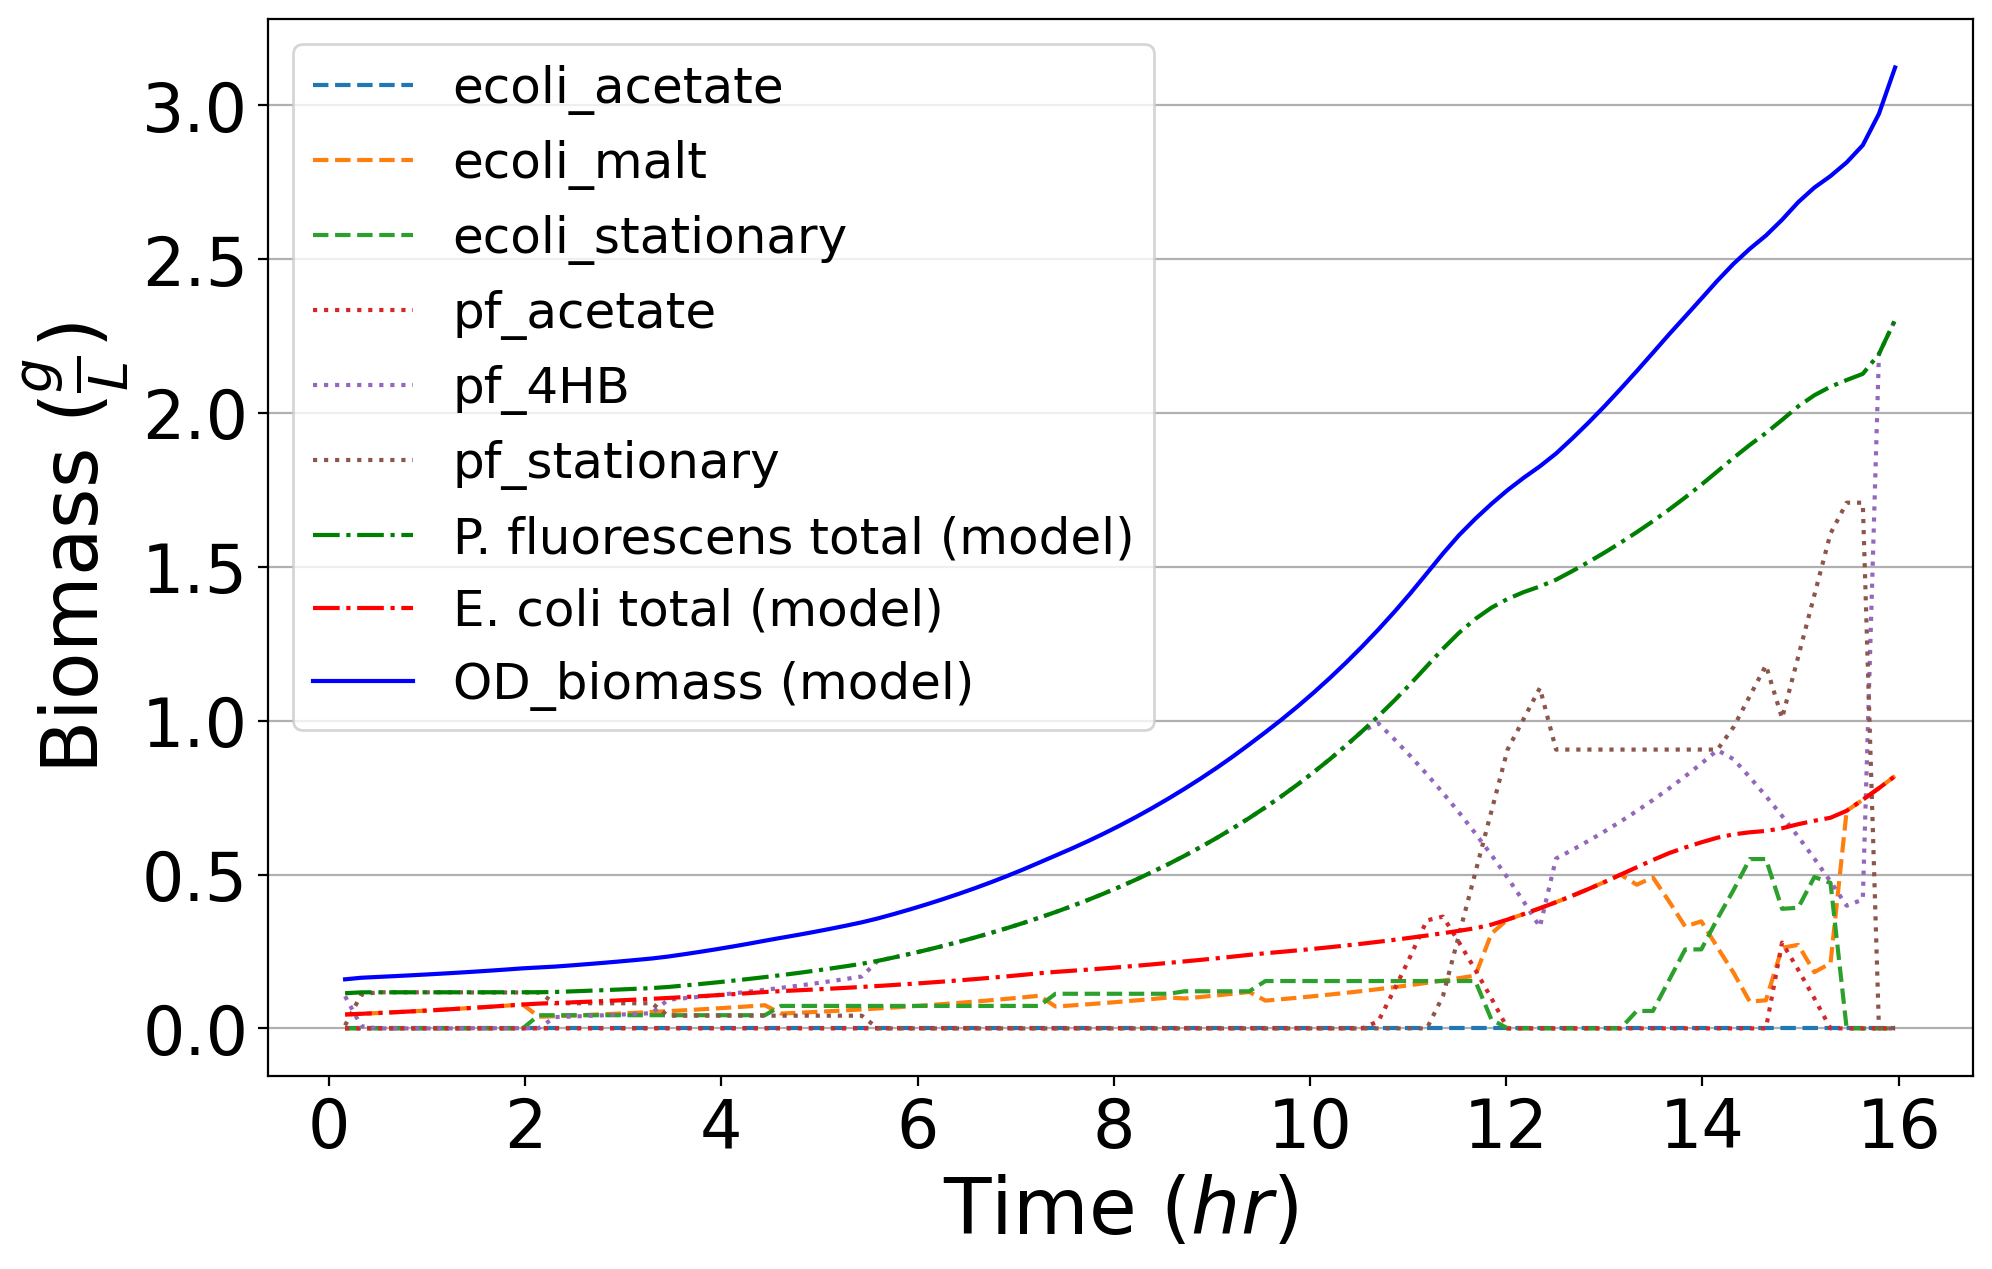

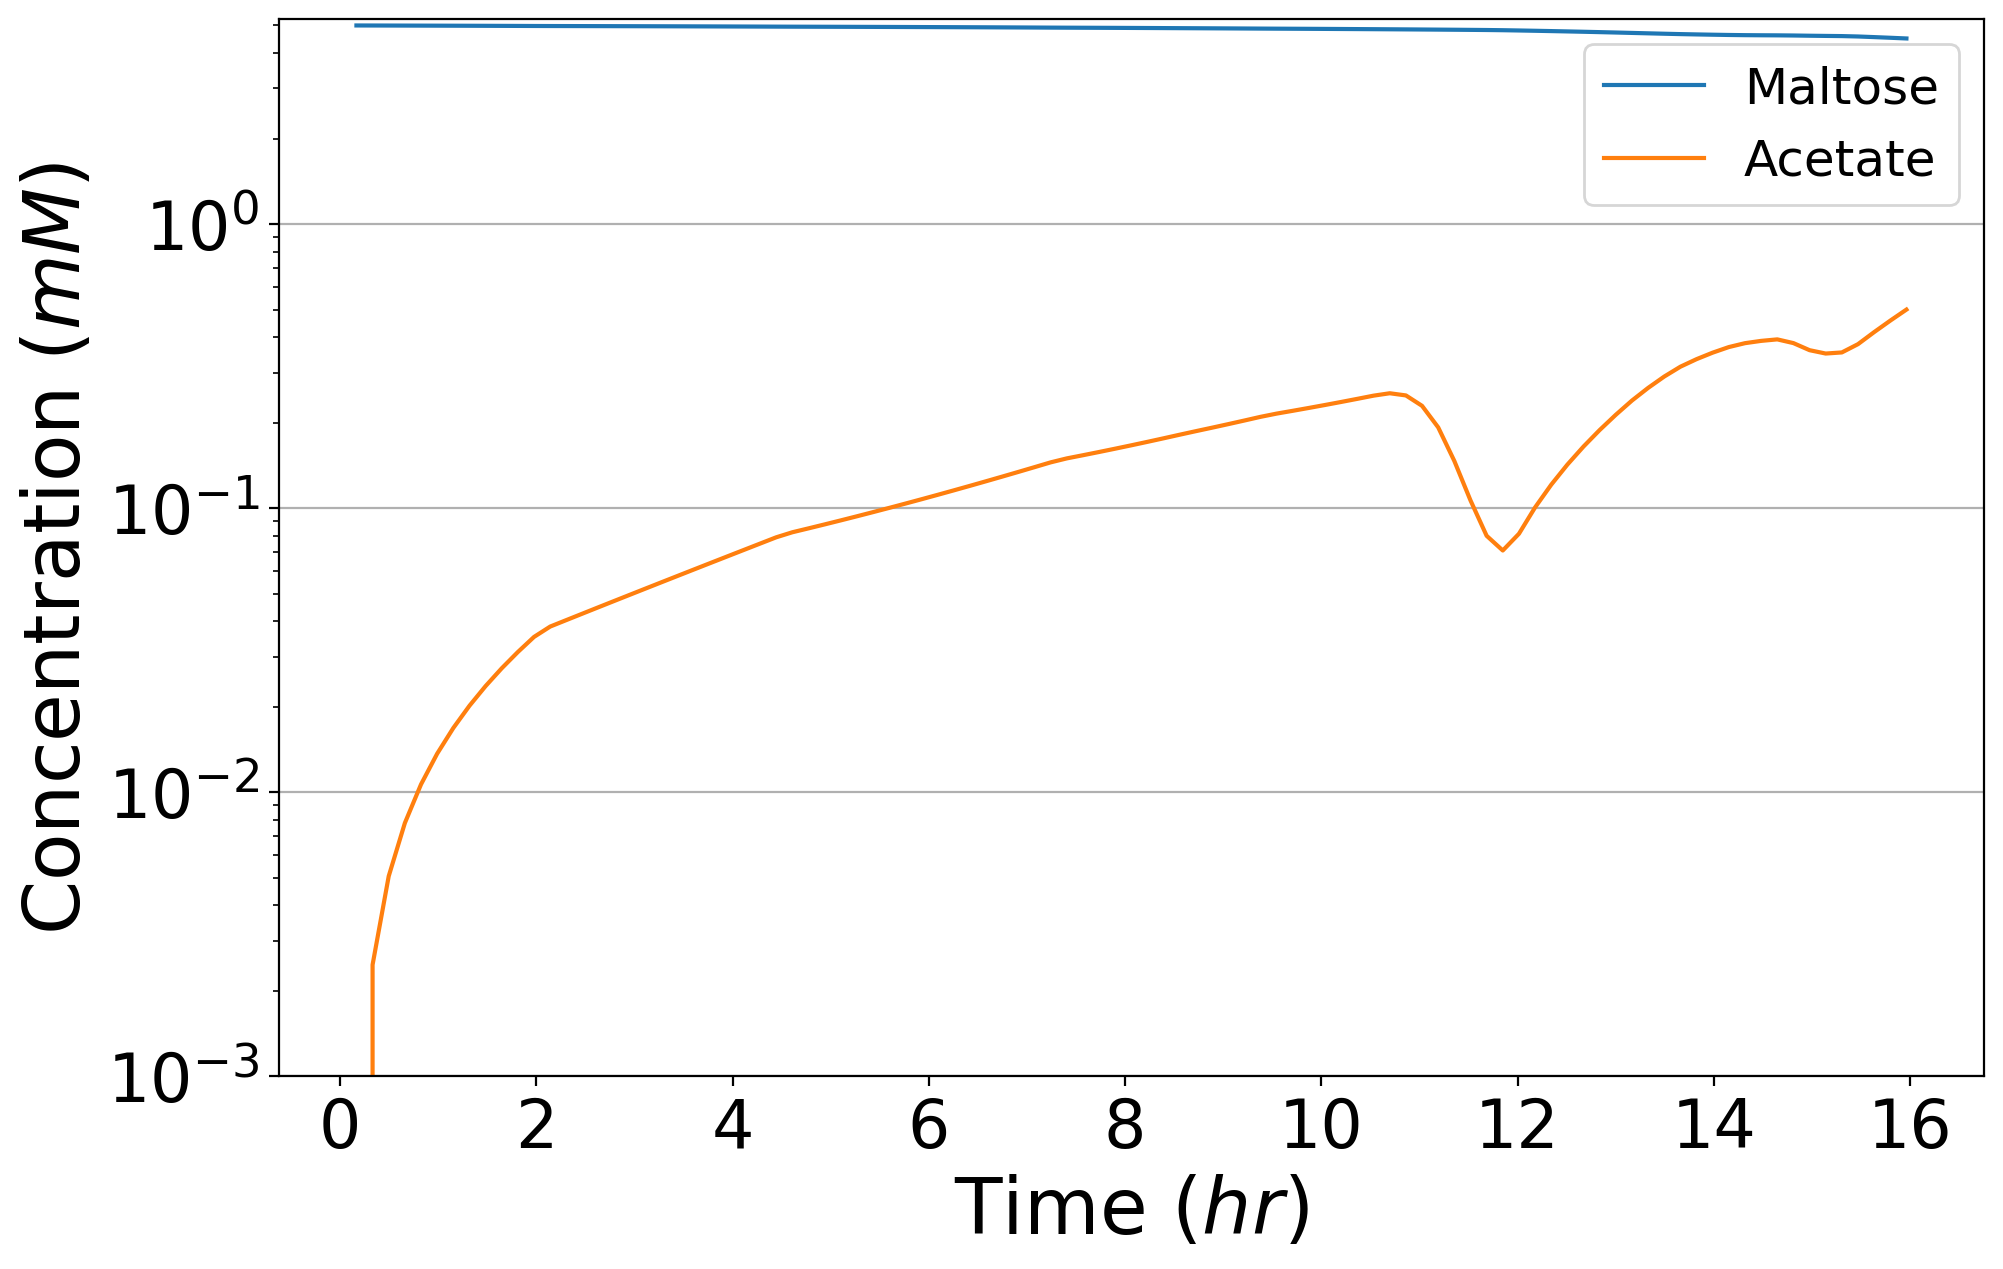

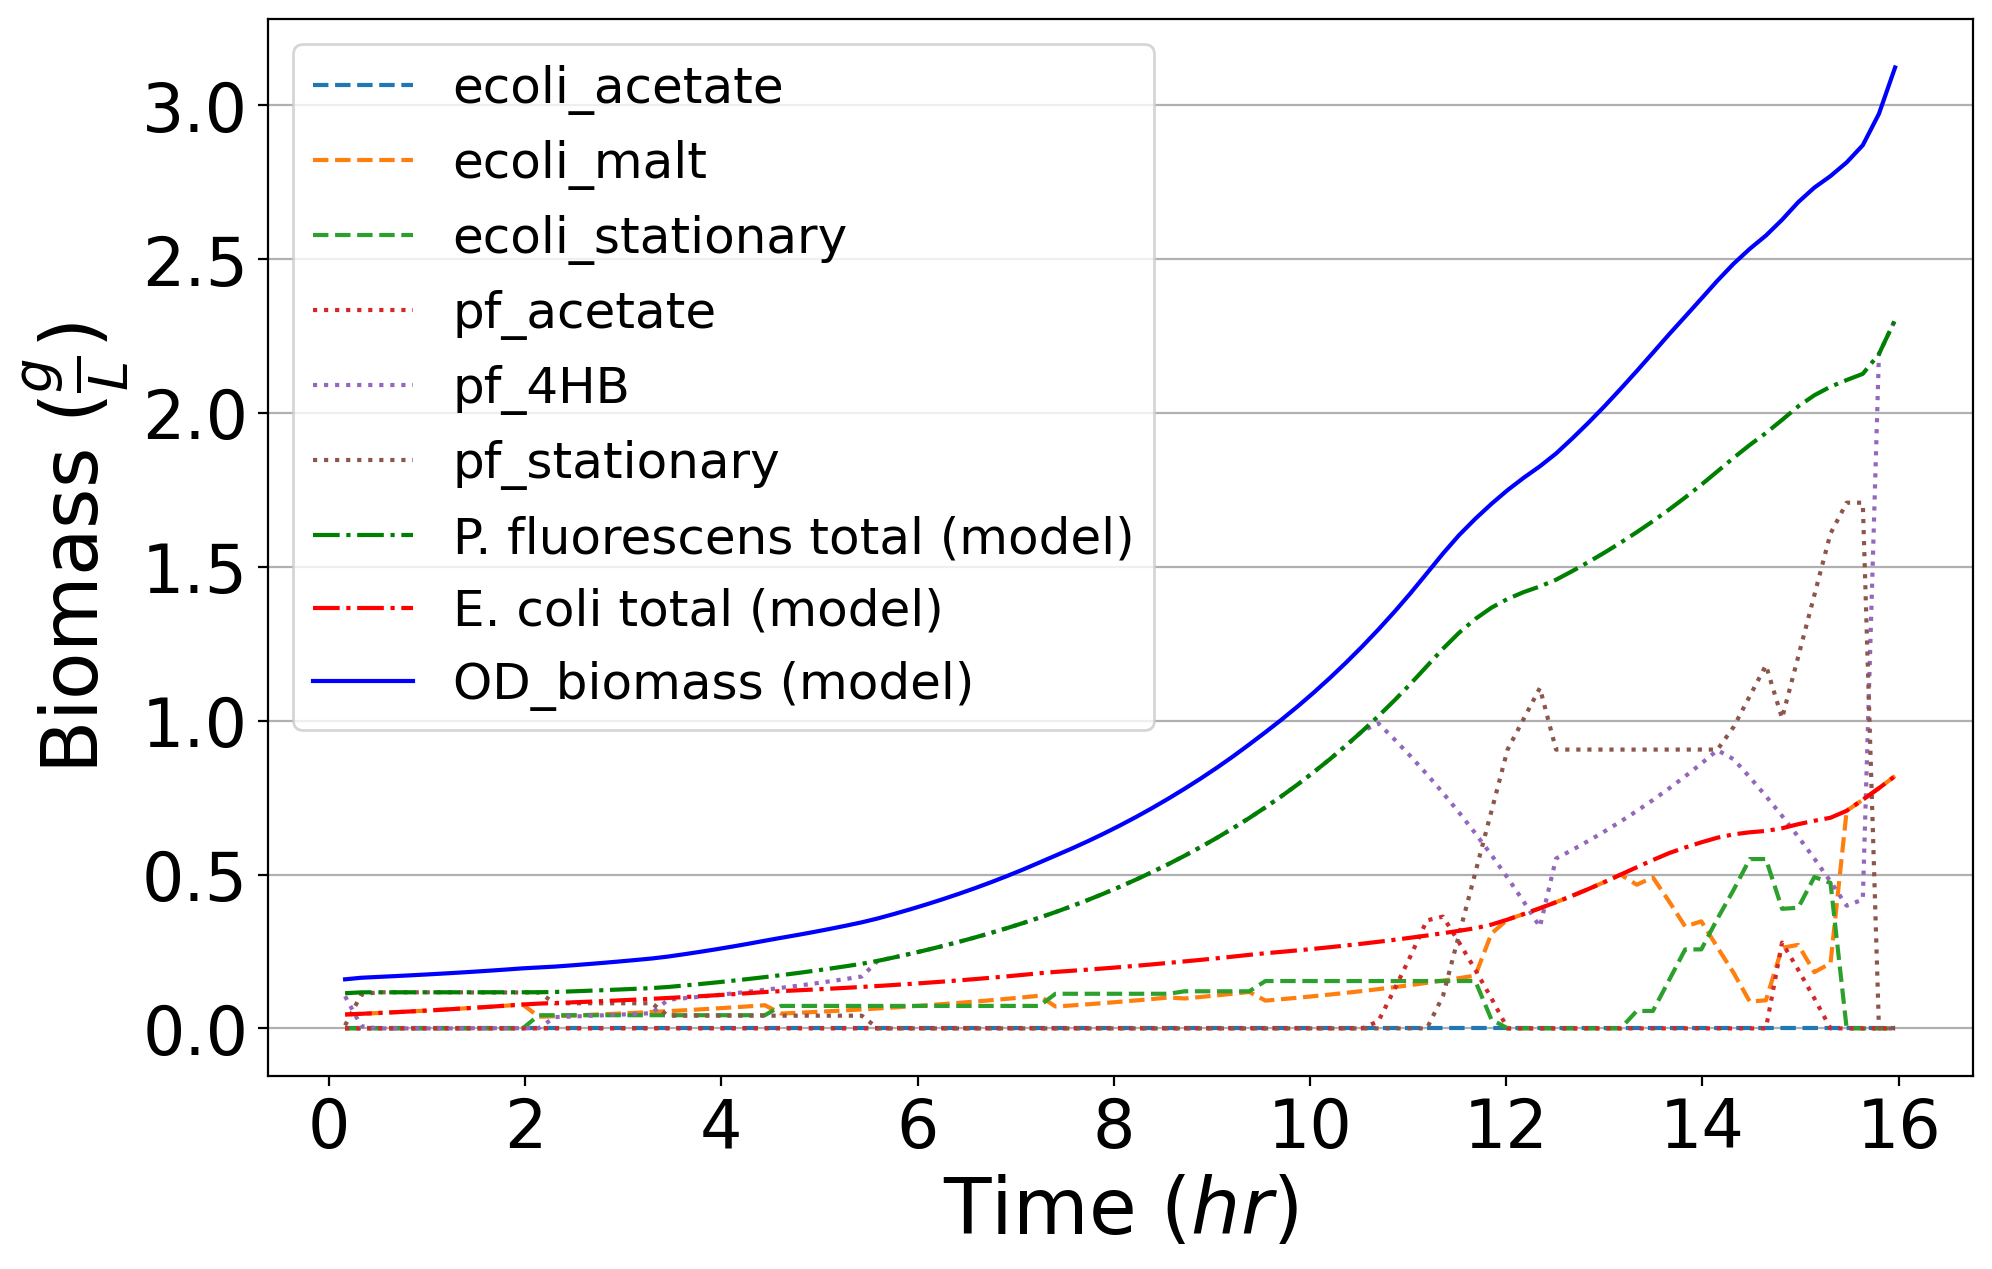

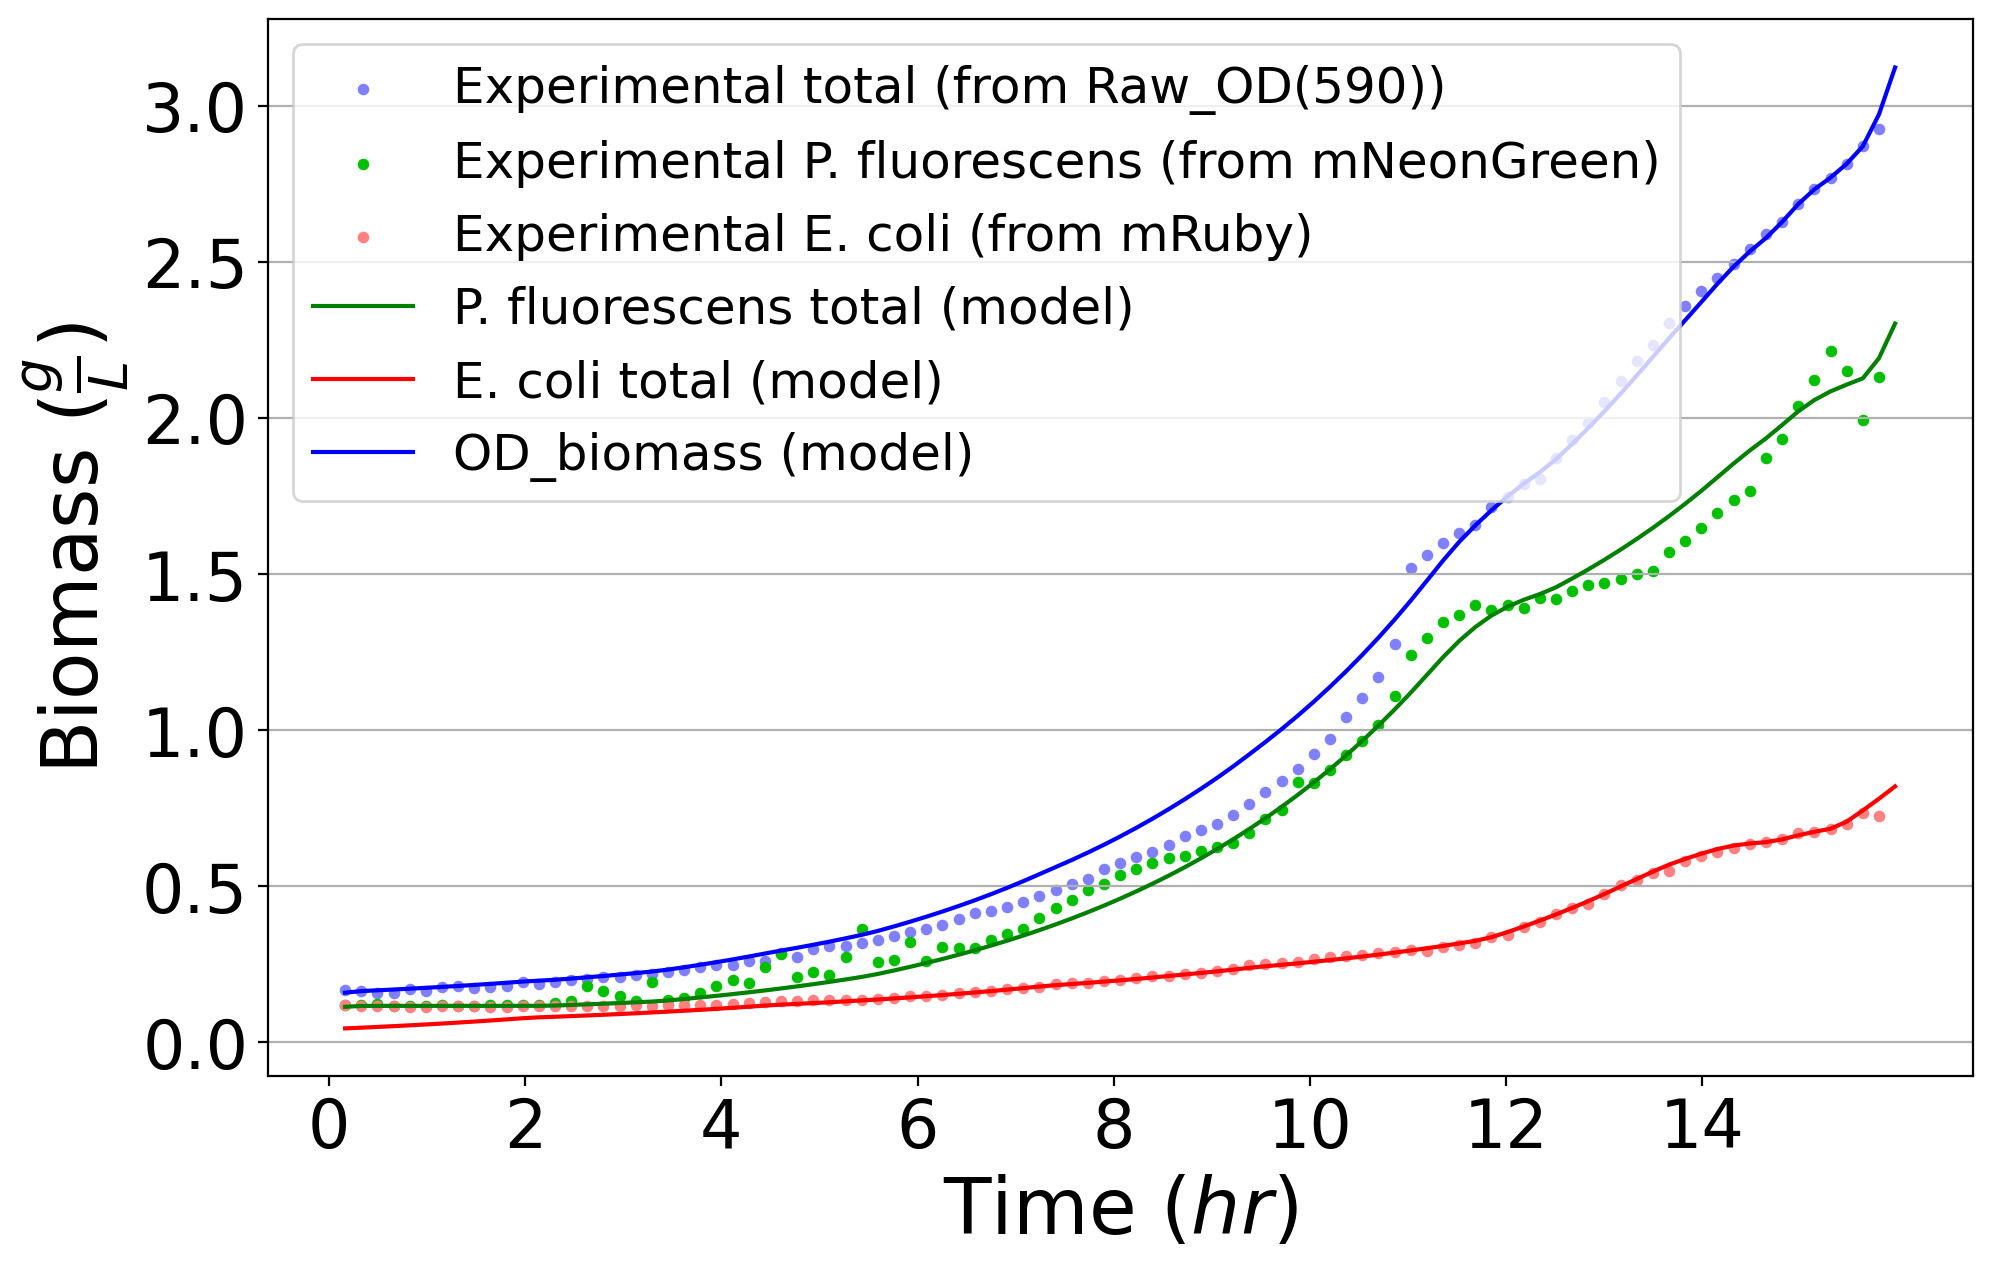

In [14]:
%run ../mscommfitting.py

maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029", "cpd00136"],
     rel_final_conc = {"cpd00179":0.9, "cpd00136":0.3},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_graphs("G50"), 
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_4HB_coculture.lp")

#### Pseudomonas

In [15]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,3,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147

In [16]:
%run ../mscommfitting.py
maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029","cpd00136"],
       graphs = update_graphs("G45"), 
     rel_final_conc = {"cpd00179":.01, "cpd00136":0.01},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_4HB_pf.lp")

Done with concentrations and biomass loops: 0.0 min
Done with DCC loop: 0.0 min
Done with the DBC & diffc loop: 0.00026041666666666666 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:81: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.018229166666666668 min
Done exporting the content: 0.0033854166666666668 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:81: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


FeasibilityError: The solution is sub-optimal, with a(n) infeasible status.

#### E. coli

In [ ]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,2,3,4,5,6,7,8,9,10,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

In [ ]:
display(experimental_metadata, growth_df, fluxes_df)

In [ ]:
%run ../mscommfitting.py
maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029","cpd00136"],
       graphs = update_graphs("G54"), 
     rel_final_conc = {"cpd00179":.01, "cpd00136":0.01},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_4HB_ecoli.lp")

# Acetate

#### Coculture

In [ ]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                }
        },
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'Fluorescence':'pf', 'Fluorescence 1':'ecoli'},
    species_abundances = {num:{"ecoli":1, "pf":1} for num in range(1,13)},
    carbon_conc_series = {'columns': {'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3}}},
    ignore_trials = {'rows': ['C', 'D', 'B', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    },
    significant_deviation=None
)
print(f"{(process_time()-time1)/60} minutes")

In [ ]:
trial_name_conversion

In [ ]:
%run ../mscommfitting.py

acetate_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
acetate_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00029"],
       graphs = update_graphs("G38"), 
     rel_final_conc = {"cpd00029":0.2},
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="acetate_coculture.lp")

#### Pseudomonas

In [ ]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'Fluorescence':'pf'},
    species_abundances = {num:{"ecoli":1, "pf":1} for num in range(1,13)},
    carbon_conc_series = {'columns': {'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3}}},
    ignore_trials = {'rows': ['C', 'E', 'B', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    },
    significant_deviation=None
)
print(f"{(process_time()-time1)/60} minutes")

In [ ]:
%run ../mscommfitting.py

acetate_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
acetate_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00029"],
       graphs = update_graphs("G26"), 
     rel_final_conc = {"cpd00029":0.2},
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="acetate_pf.lp")

#### E. coli

In [ ]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD','Fluorescence 1':'ecoli'},
    species_abundances = {num:{"ecoli":1, "pf":1} for num in range(1,13)},
    carbon_conc_series = {'columns': {'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3}}},
    ignore_trials = {'rows': ['C', 'E', 'D', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    },
    significant_deviation=None
)
print(f"{(process_time()-time1)/60} minutes")

In [ ]:
%run ../mscommfitting.py

acetate_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
acetate_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00029"],
       graphs = update_graphs("G2"), 
     rel_final_conc = {"cpd00029":0.2},
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="acetate_ecoli.lp")

# SteadyCom

In [ ]:
# import the models
from cobra.io import load_json_model
ecoli = load_json_model("../ecoli.json")
pf = load_json_model("../pf.json")

In [ ]:
%run ../../../../ModelSEED/ModelSEEDpy/modelseedpy/community/mssteadycom.py
